# Previsão de Churn no Serviço de Cartão de Crédito do Banco
Neste projeto, irei construir um <b>modelo de aprendizado de máquina para prever a probabilidade de churn dos clientes em um serviço de cartão de crédito do banco.</b> Isso envolve <b>aprendizado supervisionado (usando um conjunto de treinamento rotulado) para classificação</b>, onde o <b>alvo</b> é <b>1</b> se o <b>cliente cancelar</b>, caso contrário, <b>0.</b>

Utilizarei o seguinte <b>pipeline</b> baseado no <b>framework CRISP-DM:</b>

<b>1. Definir o problema de negócio.</b><br>
<b>2. Coletar os dados e obter uma visão geral dos mesmos.</b><br>
<b>3. Dividir os dados em conjuntos de treino e teste.</b><br>
<b>4. Explorar os dados (análise exploratória de dados)</b><br>
<b>5. Engenharia de recursos, limpeza de dados e pré-processamento.</b><br>
<b>6. Treinamento do modelo, comparação, seleção de recursos e ajuste.</b><br>
<b>7. Teste e avaliação do modelo de produção final.</b><br>
<b>8. Concluir e interpretar os resultados do modelo.</b><br>
<b>9. Implantação.</b><br>

Neste <b>notebook</b>, realizarei <b>análise exploratória de dados (EDA), cobrindo os passos de 1 a 4 do pipeline acima.</b> O principal <b>objetivo</b> aqui é <b>descobrir insights</b> que nos darão <b>informações valiosas sobre os padrões dos clientes que cancelam</b> dentro das características disponíveis. Assim, mesmo antes de construir um modelo, será possível ajudar o banco com alguns perfis e tendências de churners. Além disso, abordarei esses passos em detalhes abaixo, explicando por que estou tomando cada decisão.

# 
Problema de Negócio
Um <b>gerente</b> do <b>banco</b> está <b>preocupado</b> com o aumento do número de <b>clientes que estão deixando seus serviços de cartão de crédito</b>. Eles ficariam muito gratos se alguém pudesse <b>prever quão provável é um cliente abandonar o serviço</b>, para que possam proativamente oferecer <b>melhores serviços e influenciar a decisão dos clientes na direção oposta.</b>

<b>1.1 Qual é o contexto?</b>

Quando um <b>banco adquire um cliente</b> para seu serviço de cartão de crédito, três <b>Indicadores Chave de Performance (KPIs)</b> essenciais a considerar incluem:

<b>1. Custo de Aquisição de Cliente (CAC):</b> Mede as despesas associadas à aquisição de cada cliente de cartão de crédito, abrangendo marketing, vendas e custos relacionados. Um CAC mais baixo reflete uma aquisição de clientes eficiente.<br>

<b>2. Valor do Tempo de Vida do Cliente (CLV):</b> Estima a receita total que o banco pode esperar gerar de um cliente de cartão de crédito ao longo de seu relacionamento. Um CLV mais alto indica que o valor do cliente supera o custo de aquisição, garantindo lucratividade a longo prazo.<br>

<b>3. Taxa de Churn:</b> Geralmente expressa como uma porcentagem, representa o número de clientes de cartão de crédito que deixaram durante um período específico dividido pelo número total de clientes no início desse período.<br>

Esses <b>KPIs</b> ajudam o banco a avaliar a <b>eficácia</b> de suas estratégias na aquisição de clientes de cartão de crédito e medir o benefício financeiro potencial a longo prazo dessas aquisições.

Para <b>maximizar a lucratividade</b>, o banco visa <b>minimizar o CAC e a taxa de churn enquanto maximiza o CLV.</b>

<b>Quais são os objetivos do projeto?</b>

<b>1. Identificar os fatores associados ao churn de clientes.</b><br>
<b>2. Construir um modelo capaz de prever com precisão a probabilidade de um cliente abandonar o serviço.</b><br>
<b>3. Oferecer planos de ação para o banco reduzir o churn de clientes de cartão de crédito.</b><br>
<b>Por que a abordagem de probabilidade/classificação por score?</b>

Ao implantar o modelo para que o banco faça previsões, o objetivo principal é gerar pontuações de probabilidade para cada cliente. Isso é tipicamente mais valioso para os negócios do que fazer previsões binárias (1/0), pois permite uma tomada de decisão melhor e estratégias de retenção de clientes mais eficazes.
Por exemplo, prever a probabilidade de churn fornece insights mais acionáveis. Em vez de simplesmente determinar se um cliente vai cancelar ou não, você ganha uma compreensão de quão provável é que isso aconteça. Essa informação permite que o banco aloque seus esforços e recursos de maneira mais eficaz. Por exemplo, pode concentrar seus esforços de retenção em clientes com alta probabilidade de churn, classificando os clientes do mais provável ao menos provável de cancelar.
<b>Quais são os benefícios?</b>

<b>1. Economia de Custos</b><br>
<b>2. Melhoria na Retenção de Clientes</b><br>
<b>3. Experiência do Cliente Aprimorada</b><br>
<b>4. Marketing Direcionado</b><br>
<b>5. Proteção de Receita</b><br>
E como resultado, o mencionado <b>problema de negócio será resolvido.</b>

### Importando as bibliotecas

In [1]:
# Data manipulation and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Split the data.
from sklearn.model_selection import train_test_split

# Utils
from src.eda_utils import *

# Filter warnings.
import warnings
warnings.filterwarnings('ignore')

### Visualization Settings
%matplotlib inline

mpl.style.use('ggplot') 

mpl.rcParams['axes.facecolor']      = 'white'
mpl.rcParams['axes.linewidth']      = 1
mpl.rcParams['xtick.color']         = 'black'
mpl.rcParams['ytick.color']         = 'black'
mpl.rcParams['grid.color']          = 'lightgray'
mpl.rcParams['figure.dpi']          = 150
mpl.rcParams['axes.grid']           = True
mpl.rcParams['font.size']           = 12

# Palette Setting
color_palette = ['#023047', '#e85d04', '#0077b6', '#ff8200', '#0096c7', '#ff9c33']
# Setting as the palette
sns.set_palette(sns.color_palette(color_palette))
# Display
sns.color_palette(color_palette)

[(0.00784313725490196, 0.18823529411764706, 0.2784313725490196),
 (0.9098039215686274, 0.36470588235294116, 0.01568627450980392),
 (0.0, 0.4666666666666667, 0.7137254901960784),
 (1.0, 0.5098039215686274, 0.0),
 (0.0, 0.5882352941176471, 0.7803921568627451),
 (1.0, 0.611764705882353, 0.2)]

# Entendendo os Dados
O conjunto de dados foi coletado do Kaggle: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers?sort=votes
A origem do conjunto de dados é deste site: https://leaps.analyttica.com/home
Ele contém dados de clientes de cartão de crédito, com informações demográficas, financeiras e de produto. Já está rotulado, com os churners identificados como 1 e os não churners identificados como 0 na variável de sinalização de desistência.
Inicialmente, vou descartar duas variáveis porque não tenho acesso ao que significam, e parecem ser resultados de um modelo de aprendizado de máquina Naive Bayes.

In [2]:
data_path = '../input/BankChurners.csv'
df = pd.read_csv(data_path)

# Features that must be dropped.
df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], inplace=True)

In [3]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count   
0  768805383  Existing Customer            45      M                3  \
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category   
0     High School        Married     $60K - $80K          Blue  \
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon   
0              39  ...                       1                      3  \
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1   
0       12691.0                  777          11914.0                 1.335  \
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

### Dicionário de Dados
<b>1. CLIENTNUM:</b> Número do cliente. Identificador único para o cliente titular da conta. Categórico nominal.<br>
<b>2. Attrition_Flag:</b> Variável de evento interno (atividade do cliente) - se a conta está fechada então 1, senão 0. Categórico binário.<br>
<b>3. Customer_Age:</b> Variável demográfica - Idade do cliente em anos. Numérico discreto.<br>
<b>4. Gender:</b> Variável demográfica - M=Masculino, F=Feminino. Categórico nominal.<br>
<b>5. Dependent_count:</b> Variável demográfica - Número de dependentes. Numérico discreto.<br>
<b>6. Education_Level:</b> Variável demográfica - Qualificação educacional do titular da conta (exemplo: ensino médio, graduado em faculdade, etc.). Categórico ordinal.<br>
<b>7. Marital_Status:</b> Variável demográfica - Casado, Solteiro, Divorciado, Desconhecido. Categórico nominal.<br>
<b>8. Income_Category:</b> Variável demográfica - Categoria de Renda Anual do titular da conta (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K). Categórico ordinal.<br>
<b>9. Card_Category:</b> Variável do Produto - Tipo de Cartão (Azul, Prata, Ouro, Platina). Categórico ordinal.<br>
<b>10. Months_on_book:</b> Período de relacionamento com o banco. Numérico discreto.<br>
<b>11. Total_Relationship_Count:</b> Número total de produtos possuídos pelo cliente. Numérico discreto.<br>
<b>12. Months_Inactive_12_mon:</b> Número de meses inativo nos últimos 12 meses. Numérico discreto.<br>
<b>13. Contacts_Count_12_mon:</b> Número de contatos nos últimos 12 meses. Numérico discreto.<br>
<b>14. Credit_Limit:</b> Limite de Crédito no Cartão de Crédito. Numérico contínuo.<br>
<b>15. Total_Revolving_Bal:</b> Saldo Revolvente Total no Cartão de Crédito. Numérico discreto.<br>
<b>16. Avg_Open_To_Buy:</b> Linha de Crédito Disponível para Compras (Média dos últimos 12 meses). Numérico contínuo.<br>
<b>17. Total_Amt_Chng_Q4_Q1:</b> Mudança na Quantidade de Transações (Q4 sobre Q1). Numérico contínuo.<br>
<b>18. Total_Trans_Amt:</b> Quantidade Total de Transações (Últimos 12 meses). Numérico discreto.<br>
<b>19. Total_Trans_Ct:</b> Contagem Total de Transações (Últimos 12 meses). Numérico discreto.<br>
<b>20. Total_Ct_Chng_Q4_Q1:</b> Mudança na Contagem de Transações (Q4 sobre Q1). Numérico contínuo.<br>
<b>21. Avg_Utilization_Ratio:</b> Taxa Média de Utilização do Cartão. Numérico contínuo.<br>

Analisando as informações gerais do conjunto de dados.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [5]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 10127 rows and 21 columns.


Analisando algumas estatísticas descritivas.

In [6]:
df.describe().T

count          mean           std          min   
CLIENTNUM                 10127.0  7.391776e+08  3.690378e+07  708082083.0  \
Customer_Age              10127.0  4.632596e+01  8.016814e+00         26.0   
Dependent_count           10127.0  2.346203e+00  1.298908e+00          0.0   
Months_on_book            10127.0  3.592841e+01  7.986416e+00         13.0   
Total_Relationship_Count  10127.0  3.812580e+00  1.554408e+00          1.0   
Months_Inactive_12_mon    10127.0  2.341167e+00  1.010622e+00          0.0   
Contacts_Count_12_mon     10127.0  2.455317e+00  1.106225e+00          0.0   
Credit_Limit              10127.0  8.631954e+03  9.088777e+03       1438.3   
Total_Revolving_Bal       10127.0  1.162814e+03  8.149873e+02          0.0   
Avg_Open_To_Buy           10127.0  7.469140e+03  9.090685e+03          3.0   
Total_Amt_Chng_Q4_Q1      10127.0  7.599407e-01  2.192068e-01          0.0   
Total_Trans_Amt           10127.0  4.404086e+03  3.397129e+03        510.0   
Total_Trans_Ct            10127.0  6.485869e+01  2.347257e+01         10.0   
Total_Ct_Chng_Q4_Q1       10127.0  7.122224e-01  2.380861e-01          0.0   
Avg_Utilization_Ratio     10127.0  2.748936e-01  2.756915e-01          0.0   

                                   25%           50%           75%   
CLIENTNUM                 7.130368e+08  7.179264e+08  7.731435e+08  \
Customer_Age              4.100000e+01  4.600000e+01  5.200000e+01   
Dependent_count           1.000000e+00  2.000000e+00  3.000000e+00   
Months_on_book            3.100000e+01  3.600000e+01  4.000000e+01   
Total_Relationship_Count  3.000000e+00  4.000000e+00  5.000000e+00   
Months_Inactive_12_mon    2.000000e+00  2.000000e+00  3.000000e+00   
Contacts_Count_12_mon     2.000000e+00  2.000000e+00  3.000000e+00   
Credit_Limit              2.555000e+03  4.549000e+03  1.106750e+04   
Total_Revolving_Bal       3.590000e+02  1.276000e+03  1.784000e+03   
Avg_Open_To_Buy           1.324500e+03  3.474000e+03  9.859000e+03   
Total_Amt_Chng_Q4_Q1      6.310000e-01  7.360000e-01  8.590000e-01   
Total_Trans_Amt           2.155500e+03  3.899000e+03  4.741000e+03   
Total_Trans_Ct            4.500000e+01  6.700000e+01  8.100000e+01   
Total_Ct_Chng_Q4_Q1       5.820000e-01  7.020000e-01  8.180000e-01   
Avg_Utilization_Ratio     2.300000e-02  1.760000e-01  5.030000e-01   

                                   max  
CLIENTNUM                 8.283431e+08  
Customer_Age              7.300000e+01  
Dependent_count           5.000000e+00  
Months_on_book            5.600000e+01  
Total_Relationship_Count  6.000000e+00  
Months_Inactive_12_mon    6.000000e+00  
Contacts_Count_12_mon     6.000000e+00  
Credit_Limit              3.451600e+04  
Total_Revolving_Bal       2.517000e+03  
Avg_Open_To_Buy           3.451600e+04  
Total_Amt_Chng_Q4_Q1      3.397000e+00  
Total_Trans_Amt           1.848400e+04  
Total_Trans_Ct            1.390000e+02  
Total_Ct_Chng_Q4_Q1       3.714000e+00  
Avg_Utilization_Ratio     9.990000e-01

Algumas percepções:

A idade média é aproximadamente 46 anos. Metade dos clientes tem entre 41 e 52 anos, indicando um perfil mais velho.
Em média, os clientes possuíam aproximadamente 4 produtos do banco.
75% dos clientes passaram pelo menos 2 meses inativos nos últimos 12 meses. Isso é um indicador ruim. O banco deve planejar estratégias para melhorar o consumo de seus clientes.
75% dos clientes contataram o banco pelo menos 2 vezes nos últimos 12 meses. Isso também é ruim, algo no produto de cartão de crédito está levando os clientes a contatar a empresa, provavelmente insatisfeitos.
O limite de crédito médio é de 8.632. Além disso, parece ser assimétrico para a direita (a média é maior que a mediana, o limite de crédito mínimo é de 1.438, enquanto o máximo é de 34.516).
A taxa média de utilização é de cerca de 28%. Esse é um valor baixo. Além disso, metade dos clientes apresenta uma taxa de utilização de até 17,6%. O banco deve prestar atenção a isso e tentar aumentar a utilização de seu serviço de cartão de crédito.
Em média, os clientes realizaram aproximadamente 65 transações nos últimos 12 meses. Isso indica que os clientes realizaram cerca de 5,4 transações por mês em um ano, o que é muito baixo.
Além disso, observando os valores mínimos e máximos, parece que não há valores inconsistentes.

Analisando valores ausentes e duplicados.

In [7]:
df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [8]:
df.duplicated().sum()

0

Não há valores ausentes ou duplicados.

- Vou descartar a variável CLIENTNUM porque ela possui um valor único para cada registro, não sendo útil para a análise.
- Vou renomear as colunas para um formato padrão a fim de facilitar a manipulação dos dados. Além disso, attrition_flag será renomeado como churn_flag para fins de interpretação.
- Vou expressar as variáveis Gender e Attrition_Flag como binárias. Isso facilitará a análise exploratória de dados (EDA), como ao analisar valores percentuais.

In [9]:
df.drop(columns=['CLIENTNUM'], inplace=True)

In [10]:
df.columns = [x.lower() for x in df.columns]

In [11]:
df['gender'] = df['gender'].map({'M': 1, 'F': 0})
df['attrition_flag'] = df['attrition_flag'].map({'Attrited Customer': 1, 'Existing Customer': 0})

In [12]:
df.rename(columns={'attrition_flag': 'churn_flag'}, inplace=True)

# 3. Dividir os dados em conjuntos de treino e teste
Primeiramente, vou dividir os dados em conjuntos de treino e teste.
O conjunto de teste deve ser composto por dados que o modelo nunca viu antes.
Realizarei a Análise Exploratória de Dados (EDA) focando no conjunto de treino para evitar vazamento de dados, obter uma representação realista e avaliar o modelo corretamente com novos dados não vistos.
Especificarei stratify=y para que a função train_test_split garanta que o processo de divisão mantenha a mesma porcentagem de cada classe alvo tanto no conjunto de treino quanto no de teste. Isso é particularmente útil ao lidar com conjuntos de dados desbalanceados, o que é o caso, pois existem mais clientes existentes do que desistentes.

In [13]:
X = df.drop(columns=['churn_flag'])
y = df['churn_flag'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [14]:
print(f'Train predictor dataset shape: {X_train.shape}.')
print(f'Train target dataset shape: {y_train.shape}.')
print(f'Test predictor dataset shape: {X_test.shape}.')
print(f'Test target dataset shape: {y_test.shape}.')

Train predictor dataset shape: (8101, 19).
Train target dataset shape: (8101,).
Test predictor dataset shape: (2026, 19).
Test target dataset shape: (2026,).


In [15]:
print(f'Train target proportion: ')
print(f'{y_train.value_counts(normalize=True)}')
print(f'\nTest target proportion: ')
print(f'{y_test.value_counts(normalize=True)}')

Train target proportion: 
churn_flag
0    0.839279
1    0.160721
Name: proportion, dtype: float64

Test target proportion: 
churn_flag
0    0.839585
1    0.160415
Name: proportion, dtype: float64


As proporções das classes alvo foram preservadas.

# 4. Análise Exploratória de Dados
Explorarei o conjunto de treinamento para obter um melhor entendimento de como as características estão distribuídas individualmente, as relações entre elas, correlações, tendências e possíveis insights dos dados, especialmente em relação à variável alvo (churn_flag). Portanto, realizarei análises univariadas, bivariadas e multivariadas dos dados.

Obterei um conjunto de treino completo (com variáveis preditoras e alvo) para usar o parâmetro 'hue' do seaborn nas visualizações e examinar a matriz de correlação.

In [16]:
train = pd.concat([X_train, y_train], axis=1)
train.head()

customer_age  gender  dependent_count education_level marital_status   
2856            36       0                0         Unknown        Married  \
6515            44       1                3     High School         Single   
7141            46       1                2     High School        Married   
632             36       0                2        Graduate        Married   
3496            50       1                1        Graduate         Single   

     income_category card_category  months_on_book  total_relationship_count   
2856  Less than $40K          Blue              24                         4  \
6515     $60K - $80K        Silver              36                         5   
7141    $80K - $120K          Blue              30                         6   
632   Less than $40K          Blue              24                         3   
3496         $120K +          Blue              40                         4   

      months_inactive_12_mon  contacts_count_12_mon  credit_limit   
2856                       3                      2        2570.0  \
6515                       2                      3       25276.0   
7141                       3                      1       11670.0   
632                        1                      3        3124.0   
3496                       2                      3       34516.0   

      total_revolving_bal  avg_open_to_buy  total_amt_chng_q4_q1   
2856                 2230            340.0                 0.686  \
6515                    0          25276.0                 0.849   
7141                  915          10755.0                 0.892   
632                  1593           1531.0                 0.869   
3496                 1185          33331.0                 0.725   

      total_trans_amt  total_trans_ct  total_ct_chng_q4_q1   
2856             1755              42                0.448  \
6515             2282              38                0.583   
7141             4277              89                0.854   
632              1652              41                0.367   
3496             3874              72                0.714   

      avg_utilization_ratio  churn_flag  
2856                  0.868           0  
6515                  0.000           1  
7141                  0.078           0  
632                   0.510           0  
3496                  0.034           0

Criarei listas separadas para características categóricas, numéricas e alvo, a fim de analisar os dados separadamente.

In [18]:
numerical_features = X_train.select_dtypes('number').columns.tolist()
categorical_features = X_train.select_dtypes('object').columns.tolist()
target = 'churn_flag'

print(f'Há {len(numerical_features)} características numéricas. Elas são: ')
print(numerical_features)
print(f'\nHá {len(categorical_features)} características categóricas. Elas são: ')
print(categorical_features)
print(f'\nA característica alvo é: {target}.')

Há 15 características numéricas. Elas são: 
['customer_age', 'gender', 'dependent_count', 'months_on_book', 'total_relationship_count', 'months_inactive_12_mon', 'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal', 'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt', 'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio']

Há 4 características categóricas. Elas são: 
['education_level', 'marital_status', 'income_category', 'card_category']

A característica alvo é: churn_flag.


Vou examinar os valores únicos das características categóricas. A cardinalidade é um fator importante ao escolher uma técnica de codificação para elas.

In [20]:
for feature in categorical_features:
    print(feature)
    print('-'*40)
    print(f'Há {train[feature].nunique()} valores únicos. Eles são: ')
    print(train[feature].value_counts(normalize=True))
    print()

education_level
----------------------------------------
Há 7 valores únicos. Eles são: 
education_level
Graduate         0.306382
High School      0.203679
Unknown          0.148994
Uneducated       0.146031
College          0.098259
Post-Graduate    0.052710
Doctorate        0.043945
Name: proportion, dtype: float64

marital_status
----------------------------------------
Há 4 valores únicos. Eles são: 
marital_status
Married     0.463523
Single      0.387853
Unknown     0.074682
Divorced    0.073941
Name: proportion, dtype: float64

income_category
----------------------------------------
Há 6 valores únicos. Eles são: 
income_category
Less than $40K    0.349586
$40K - $60K       0.178990
$80K - $120K      0.149241
$60K - $80K       0.140230
Unknown           0.109369
$120K +           0.072584
Name: proportion, dtype: float64

card_category
----------------------------------------
Há 4 valores únicos. Eles são: 
card_category
Blue        0.933095
Silver      0.053203
Gold        0.

As variáveis education_level, income_category e card_category apresentam relações ordinais. Portanto, o OrdinalEncoder pode ser uma boa escolha para codificá-las.
Exceto card_category, todos os atributos categóricos possuem uma categoria 'desconhecida'. Investigarei a distribuição de churn dentro desta categoria e decidirei como lidar com ela posteriormente. Se 'desconhecido' apresentar discriminação entre churners e não churners, será uma boa prática mantê-la como outra categoria das variáveis. Imputar ou remover essas categorias introduziria viés e perda de informação, uma vez que o padrão de churn não ocorre aleatoriamente dentro deste grupo e ajudaria o modelo a distinguir entre clientes que cancelam e não cancelam.

### Análise Univariada
Realizarei a análise univariada a seguir para ver quais são os valores típicos de cada característica dos clientes do banco.

### Distribuição da Variável Alvo

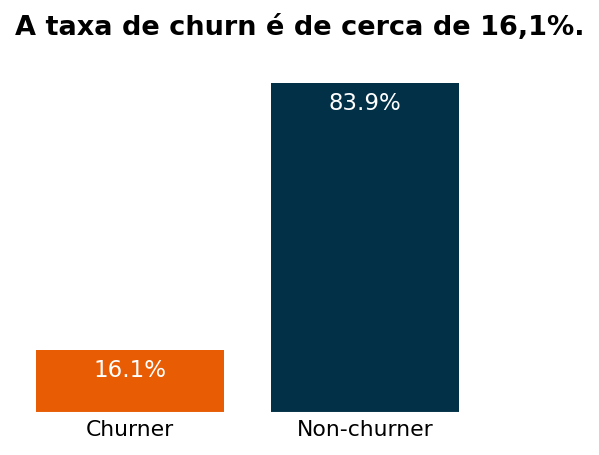

In [22]:
# Group the data by churn flag.
churn_grp = train.groupby(['churn_flag'])[['churn_flag']].count().rename(columns={'churn_flag': 'count'}).reset_index()
churn_grp['pct'] = (churn_grp['count'] / churn_grp['count'].sum()) * 100
churn_grp = churn_grp.sort_values(by=['pct'])

# Define the plot.
fig, ax = plt.subplots(figsize=(4, 3))
        
# Plot the barplot.
bars = ax.bar(x=churn_grp['churn_flag'], height=churn_grp['pct'], color=['#e85d04', '#023047'])
        
# Customize the plot.
ax.set_title('A taxa de churn é de cerca de 16,1%.', fontweight='bold', fontsize=13, pad=15, loc='left')
ax.set_xlabel('')
ax.set_xticks(ticks=range(2), labels=['Non-churner', 'Churner'], fontsize=10.5)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.invert_xaxis()
        
ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(False)

for bar in bars:
    height = bar.get_height()
    ax.annotate('{:.1f}%'.format(height), 
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, -10),  
                textcoords="offset points",
                ha='center', va='center',
                fontsize=11, color='white')

A variável alvo está desbalanceada. 16,1% dos clientes são churners. Assim, adotarei algumas estratégias para lidar com isso. Elas são:

Validação cruzada estratificada e hold-out para manter a proporção da variável alvo nos conjuntos de teste e validação, inclusive durante o ajuste de hiperparâmetros.
Definir pesos diferentes para as classes majoritária e minoritária. A ideia é definir pesos maiores para a classe minoritária, de modo que o modelo seja penalizado ao classificar erroneamente um cliente como churner. Esses pesos são definidos no hiperparâmetro específico do modelo para isso.
Avaliar o trade-off entre precisão e recall, se necessário. O objetivo principal aqui é prever probabilidades de churn, não uma predição binária. Isso permitirá que o banco tome decisões mais bem informadas. Em vez de simplesmente avaliar se um cliente vai desistir ou não, ele pode verificar quão provável é que ele abandone o serviço.

### Distribuições de Características Numéricas
Vou analisar as distribuições das características numéricas a seguir para verificar se existem distribuições assimétricas e quais são os valores mais comuns para os atributos numéricos dos clientes do banco.

In [23]:
numplots_features = ['customer_age', 
                     'months_on_book', 
                     'credit_limit', 
                     'total_revolving_bal', 
                     'avg_open_to_buy', 
                     'total_amt_chng_q4_q1', 
                     'total_trans_amt', 
                     'total_trans_ct', 
                     'total_ct_chng_q4_q1', 
                     'avg_utilization_ratio',
                     'total_relationship_count']

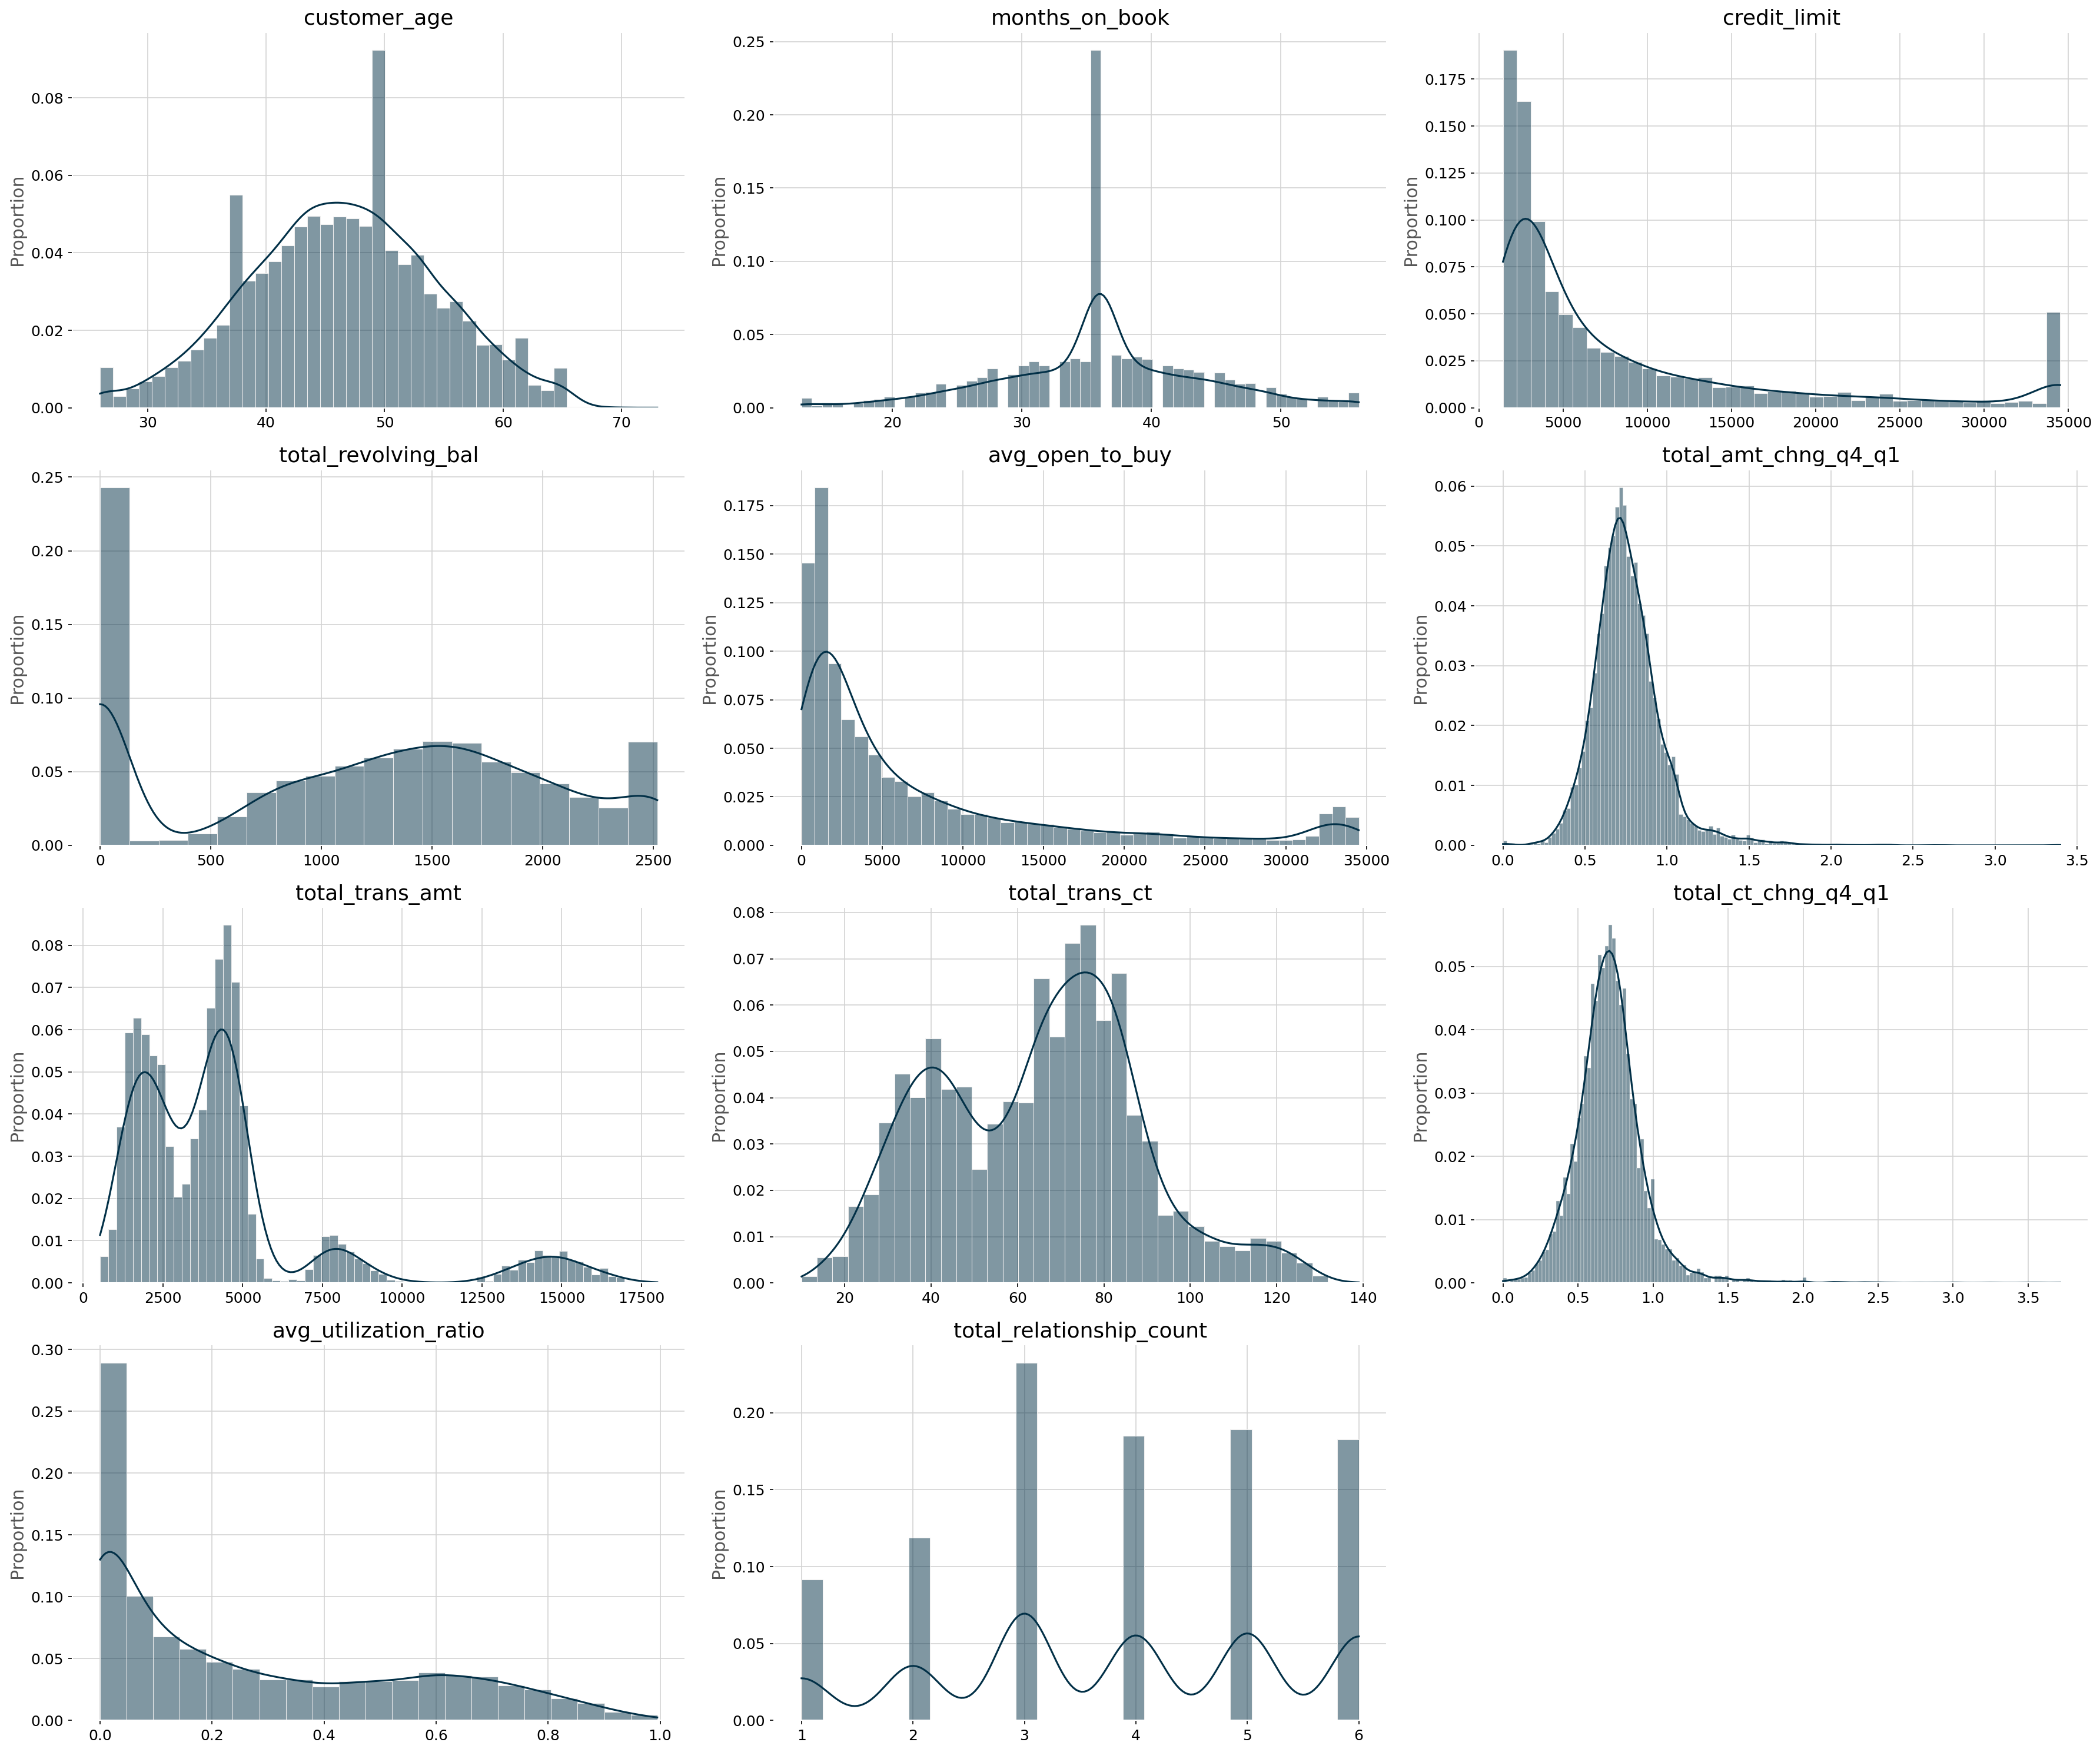

In [24]:
analysis_plots(data=train, features=numplots_features, kde=True, figsize=(24, 20))

Insights:
- A maioria dos clientes tem entre 40 e 50 anos de idade.

- Uma grande parte dos clientes passou 36 meses utilizando os serviços de cartão de crédito do banco.

- O limite de crédito é assimétrico à direita. Isso significa que a maioria dos clientes possui limites de crédito baixos, enquanto há relativamente poucos clientes com limites de crédito altos. No entanto, é possível observar que uma parcela significativa deles, cerca de 5%, possui um limite de crédito alto, em torno de 35.000. Além disso, tanto o avg_open_to_buy quanto o avg_utilization_ratio também são positivamente assimétricos.

- O banco deve estar atento à distribuição da taxa média de utilização. Sendo assimétrica à direita, significa que a maioria dos clientes tem uma baixa utilização do serviço. 

- Particularmente, uma grande parte deles, cerca de 25%, apresenta taxa de utilização zero. Portanto, a empresa deve planejar estratégias para aumentar a utilização e, consequentemente, a receita.

- Uma grande parte dos clientes, também cerca de 25%, tem um saldo rotativo total zero. Saldos rotativos totais mais baixos (especialmente zero) podem indicar uma probabilidade significativa de churn. Considerando que a taxa de utilização média e o saldo rotativo total apresentam a mesma proporção de registros zero, essas variáveis podem ser correlacionadas. 

- As distribuições de quantidade total de transações e montante parecem ter dois picos. Deve haver uma distinção nessas distribuições com relação ao churn flag, o que investigarei mais a fundo na análise. Além disso, uma grande parte dos clientes realizou cerca de 80 ou 40 transações nos últimos 12 meses. Montantes de transações em torno de 5.000 e 2.500 foram comuns.

- Cerca de 80% dos clientes possuíam pelo menos 3 produtos do banco.

### Análise de Outliers

Vou analisar os outliers nos dados para verificar se representam informações inconsistentes, como erros de medição. Uma vez feito isso, decidirei se os tratarei ou não. Além disso, vou plotar boxplots abaixo para fins de visualização.

In [25]:
outlier_indexes, outlier_counts, total_outliers = check_outliers(data=train, features=numplots_features)

There are 3344 outliers in the dataset.

Number (percentage) of outliers per feature: 

customer_age: 2 (0.02)%
months_on_book: 450 (5.55)%
credit_limit: 784 (9.68)%
total_revolving_bal: 0 (0.0)%
avg_open_to_buy: 775 (9.57)%
total_amt_chng_q4_q1: 311 (3.84)%
total_trans_amt: 704 (8.69)%
total_trans_ct: 1 (0.01)%
total_ct_chng_q4_q1: 317 (3.91)%
avg_utilization_ratio: 0 (0.0)%
total_relationship_count: 0 (0.0)%


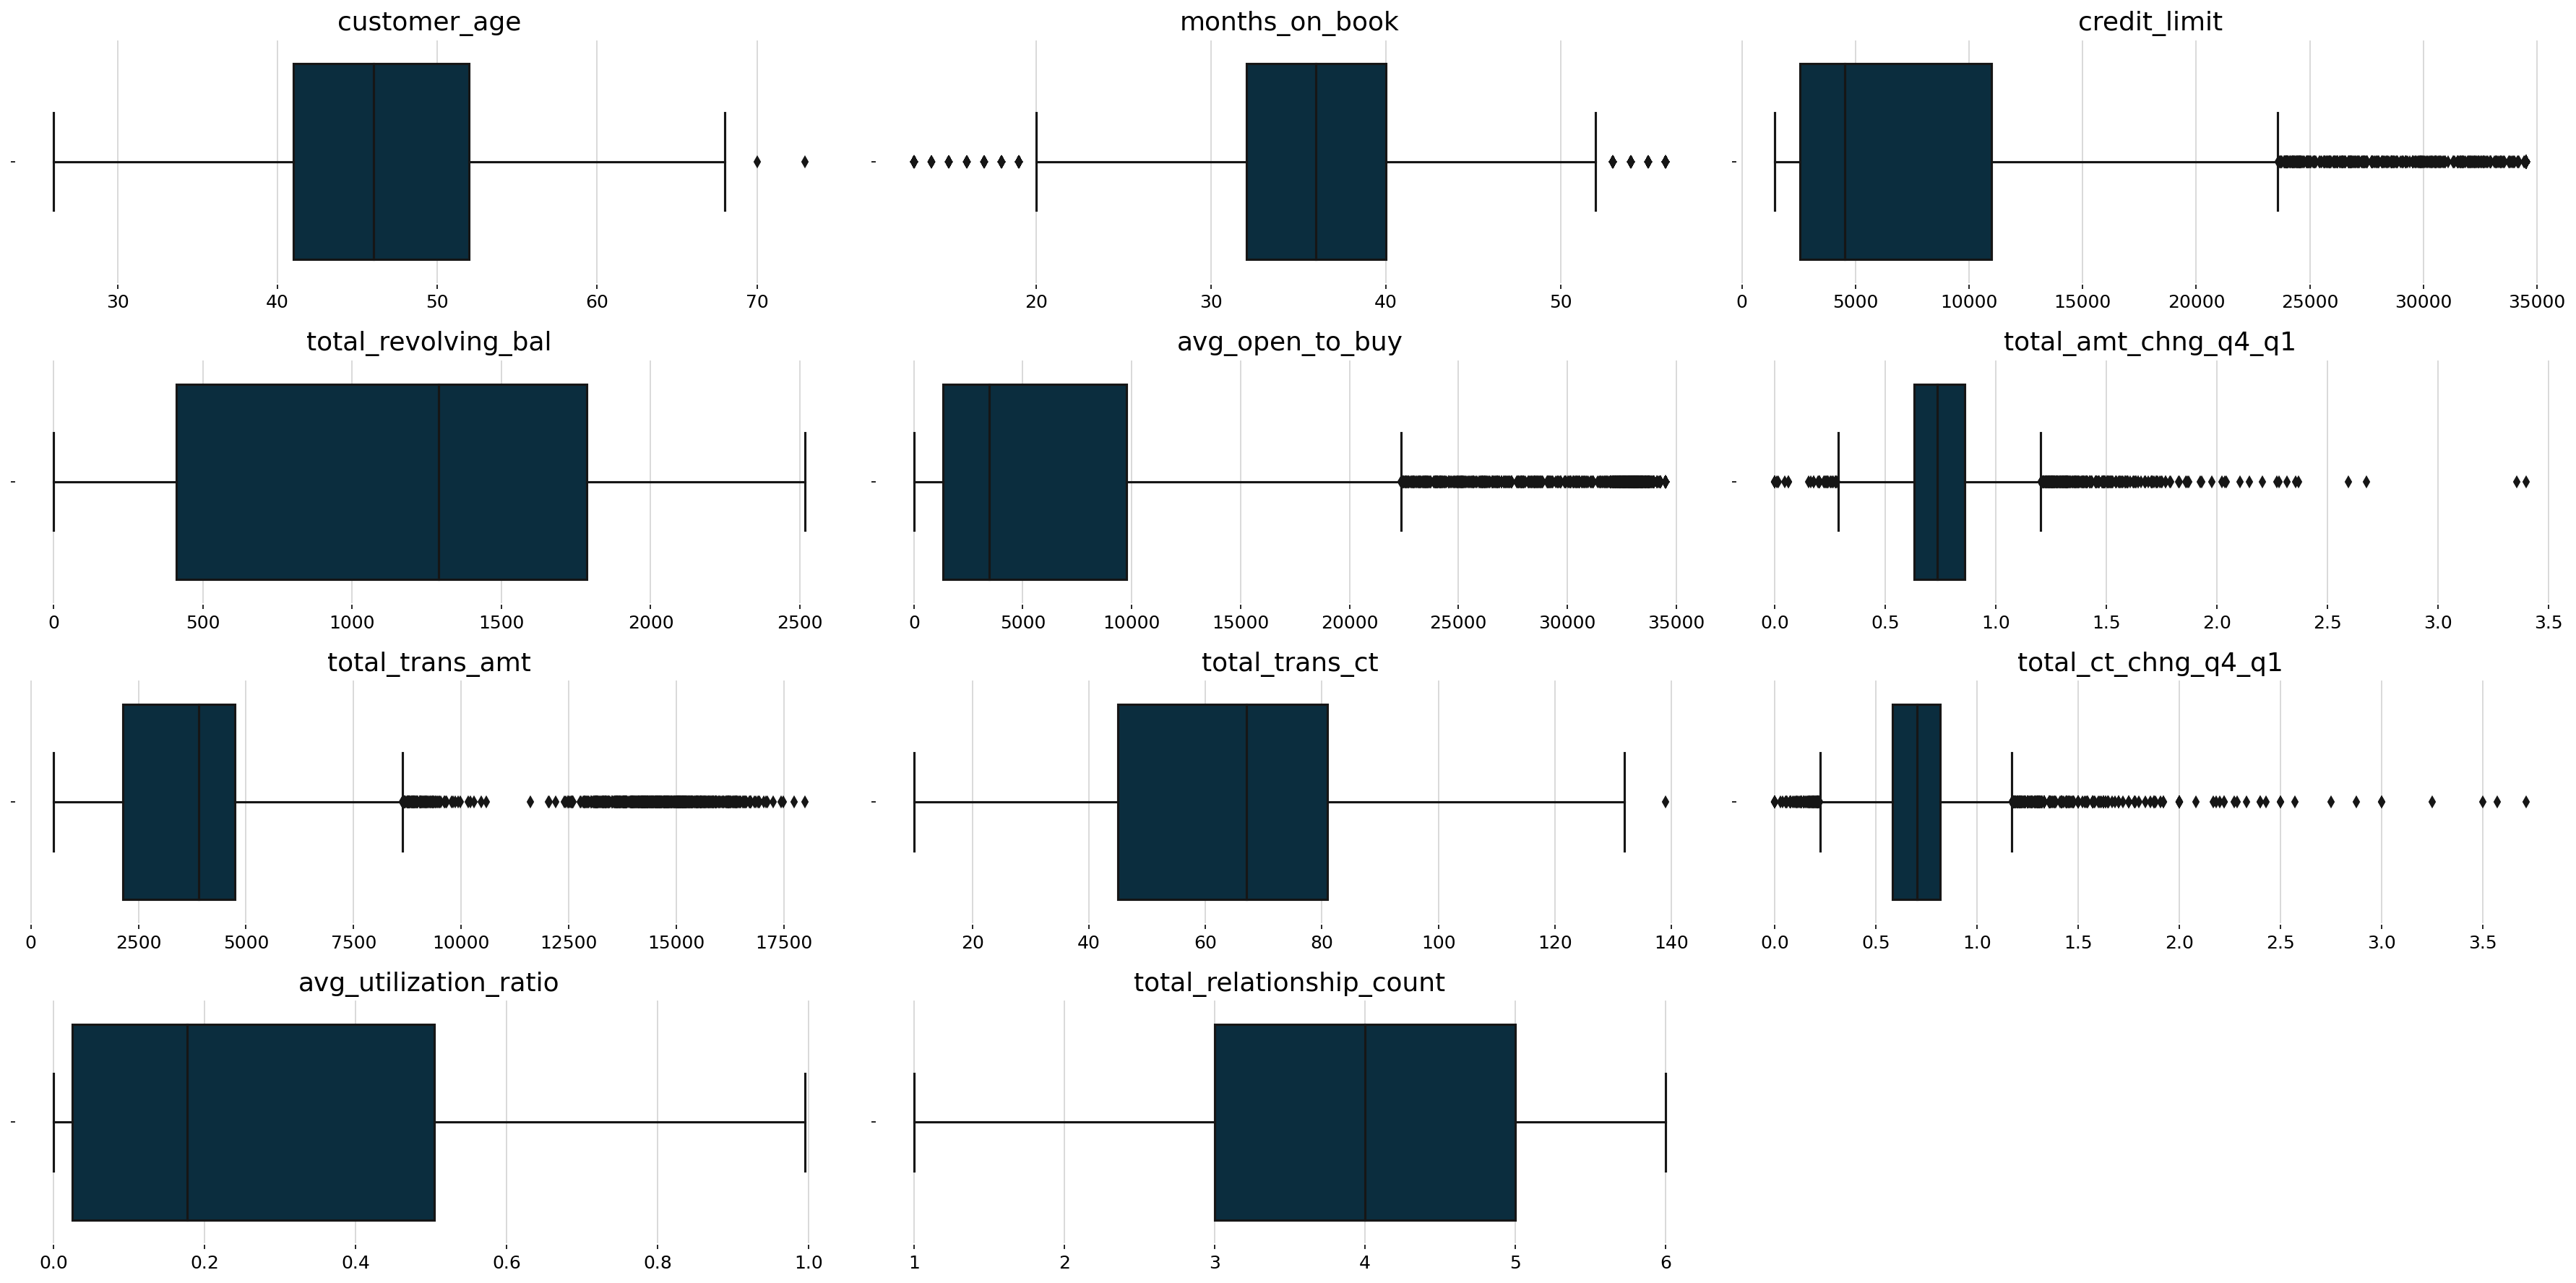

In [26]:
analysis_plots(data=train, features=numplots_features, outliers=True)

As proporções de outliers são baixas em cada característica. Além disso, uma vez que eles não representam informações inconsistentes, como erros de medição, eu não os removerei.

### Distribuições de Características Categóricas
Vou analisar as distribuições das características categóricas a seguir para avaliar quais são as características mais comuns dos clientes do banco.

In [27]:
barplot_discrete_features = ['gender', 
                             'dependent_count', 
                             'months_inactive_12_mon', 
                             'contacts_count_12_mon']
barplot_features = barplot_discrete_features + categorical_features

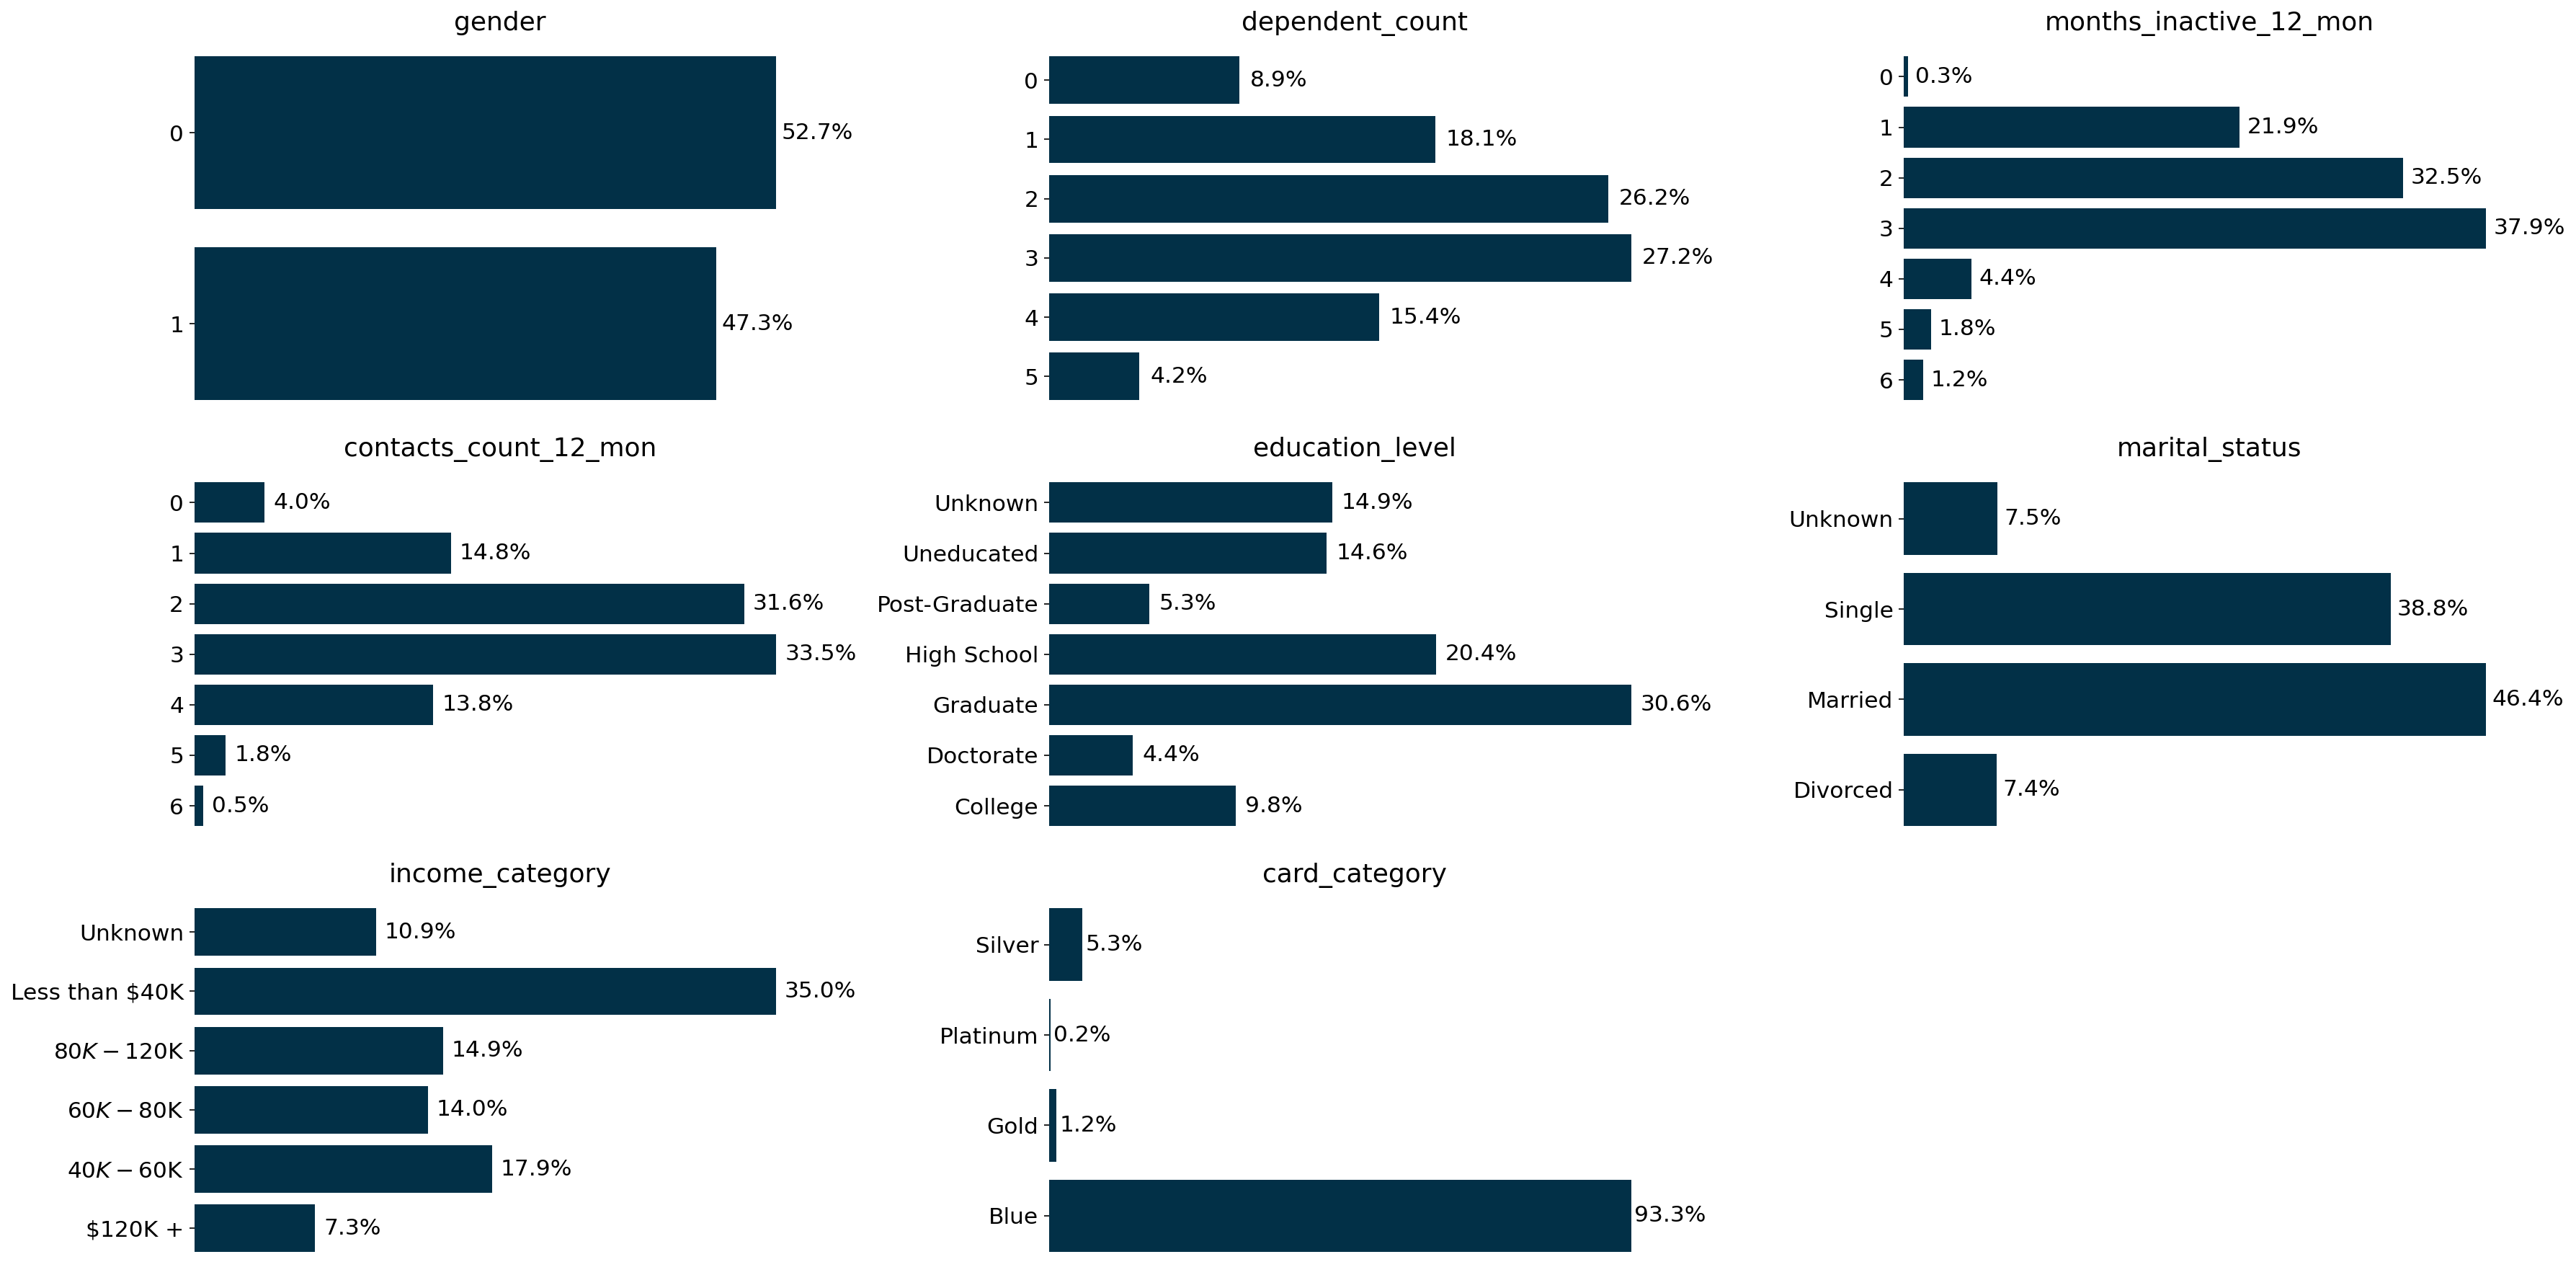

In [28]:
analysis_plots(data=train, features=barplot_features, barplot=True, figsize=(24, 12))

Insights:
- Quase 53% dos clientes são do sexo feminino.

- Mais de 50% dos clientes têm 2 ou 3 dependentes.

- 90% dos clientes estiveram inativos de 1 a 3 meses no último ano. O banco deve planejar estratégias não apenas para aumentar a taxa de utilização, mas também para evitar a inatividade dos clientes.

- A maioria dos clientes (aproximadamente 65% deles) contatou o banco 2 ou 3 vezes nos últimos 12 meses.

- A maioria dos clientes é casada ou solteira, graduada, ganha menos de $40K e possui um cartão de crédito azul.

- Existem algumas categorias com proporções extremamente baixas de observações, como 0 meses inativos e 6 contatos nos últimos 12 meses. Além disso, a categoria do cartão é altamente desbalanceada, com quase 99% dos clientes possuindo tipos azul ou prata. Particularmente, azul corresponde a 93,3% das observações. Isso será levado em conta na etapa de modelagem. 

- Manter categorias com proporções extremamente baixas de observações pode levar ao overfitting e a categoria do cartão pode não ter poder discriminatório.

### Matriz de Correlação
Examinarei a matriz de correlação para identificar quaisquer relações lineares entre as características dos dados, particularmente com a variável alvo, e avaliar a força e direção dessas relações. Isso é importante para entender quais variáveis têm maior influência sobre o churn dos clientes e podem ajudar a eliminar problemas de multicolinearidade antes da modelagem.

In [29]:
corr_matrix = train.corr(numeric_only=True)

In [30]:
corr_matrix['churn_flag'].sort_values(ascending=False)

churn_flag                  1.000000
contacts_count_12_mon       0.205486
months_inactive_12_mon      0.157937
dependent_count             0.030940
customer_age                0.017256
months_on_book              0.008124
avg_open_to_buy             0.000161
credit_limit               -0.023976
gender                     -0.042009
total_amt_chng_q4_q1       -0.129157
total_relationship_count   -0.157092
total_trans_amt            -0.173479
avg_utilization_ratio      -0.188519
total_revolving_bal        -0.267587
total_ct_chng_q4_q1        -0.286473
total_trans_ct             -0.372500
Name: churn_flag, dtype: float64

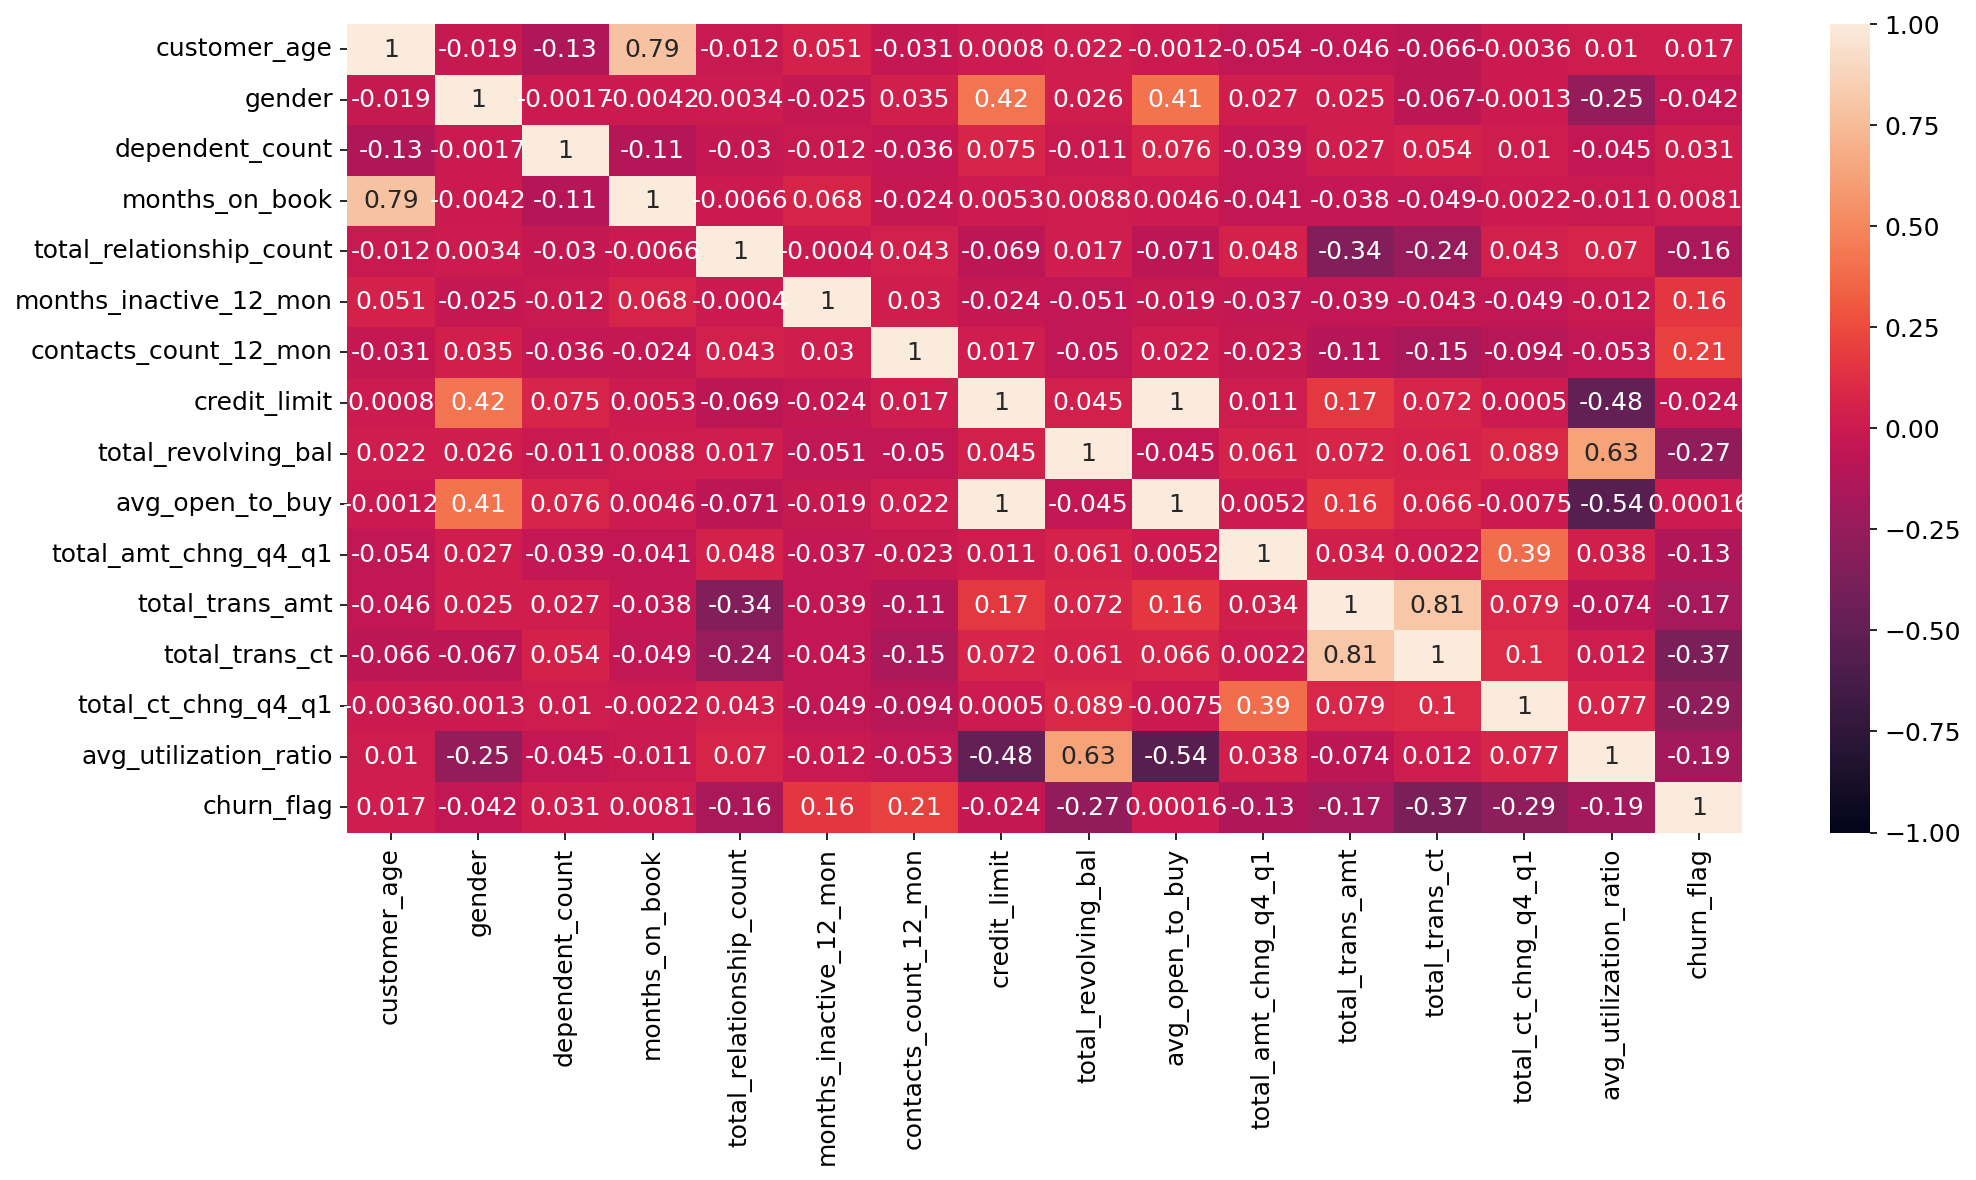

In [31]:
plt.figure(figsize=(15, 7))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)
plt.show()

Insights:
- A contagem total de transações, o saldo rotativo total e a mudança na contagem total têm uma correlação negativa moderada com o alvo. Isso faz total sentido. Quanto menos transações um cliente faz, mais provável é que ele desista. Além disso, clientes com saldos rotativos mais baixos e menos variação em suas contagens de transações tendem a desistir devido à inatividade.

- A idade do cliente e os meses no livro têm uma forte correlação positiva. Quanto mais velho é um cliente, mais tempo ele passa consumindo os serviços de cartão de crédito do banco e vice-versa. Assim, a empresa deve focar seus esforços em reter os clientes antigos e leais e aumentar o tempo de permanência dos mais jovens.

- O limite de crédito e a taxa de utilização média têm uma correlação negativa moderada. Quanto maior o limite de crédito do cliente, menor a taxa de utilização média.

- O saldo rotativo total e a taxa de utilização média têm uma forte correlação positiva. Isso faz sentido. À medida que um cliente usa mais seu cartão de crédito, ele terá que pagar saldos rotativos mais altos.

- Curiosamente, o gênero tem uma correlação positiva moderada com o limite de crédito. Isso pode indicar que clientes do sexo masculino tendem a ter limites de crédito mais altos do que os do sexo feminino.

- Algumas características que são naturalmente relacionadas são altamente correlacionadas, como esperado. Este é o caso da quantidade total de transações e da contagem total de transações. Ao construir modelos lineares, temos que nos preocupar com problemas de multicolinearidade, que ocorrem quando duas ou mais variáveis independentes são altamente correlacionadas. Embora seja diagnosticado com o fator de inflação de variância, observar a correlação de Pearson entre pares pode nos indicar esse problema. É o caso aqui. No entanto, uma vez que focarei no poder preditivo, usando algoritmos mais robustos como LightGBM, não me preocuparei com isso agora.

- Curiosamente, a média de crédito disponível e o limite de crédito são perfeitamente correlacionados positivamente. Isso significa que essas duas variáveis têm uma relação linear forte e consistente na mesma direção. Isso faz sentido, já que crédito disponível significa a quantia restante no cartão de crédito para usar e limite significa a quantia usada que ainda não foi paga. Como apresentam essa correlação perfeita, uma delas se torna redundante. Assim, eliminarei avg_open_to_buy na etapa de modelagem porque credit_limit é mais informativo.

Vamos examinar algumas dessas relações abaixo.

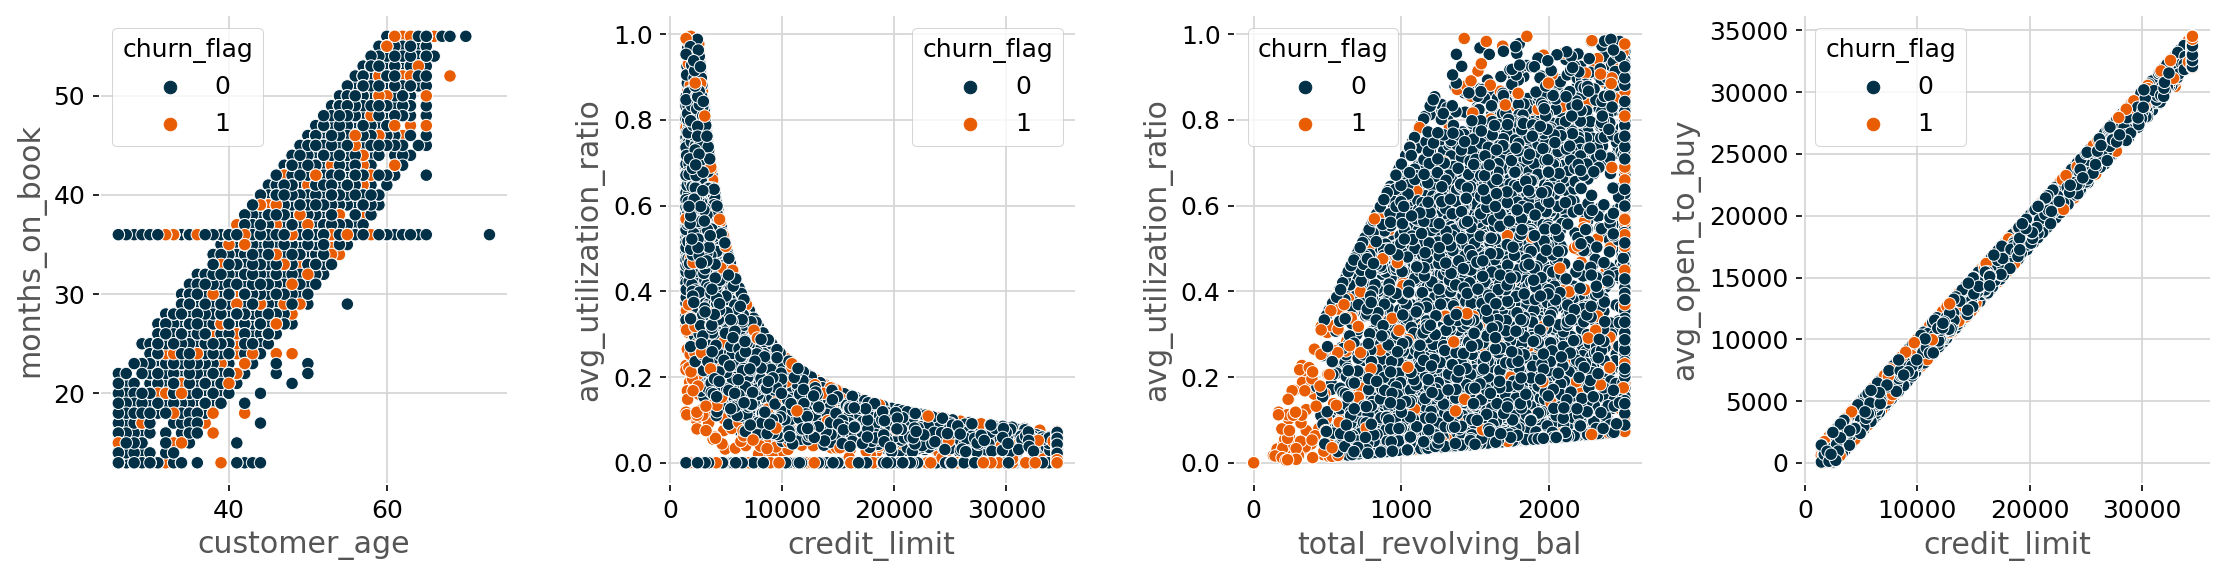

In [32]:
fig, axes = plt.subplots(1, 4, figsize=(15, 4))
sns.scatterplot(data=train, x='customer_age', y='months_on_book', hue='churn_flag', ax=axes[0])
sns.scatterplot(data=train, x='credit_limit', y='avg_utilization_ratio',  hue='churn_flag', ax=axes[1])
sns.scatterplot(data=train, x='total_revolving_bal', y='avg_utilization_ratio',  hue='churn_flag', ax=axes[2])
sns.scatterplot(data=train, x='credit_limit', y='avg_open_to_buy',  hue='churn_flag', ax=axes[3])
plt.tight_layout()
plt.show()

Curiosamente, o limite de crédito e a taxa de utilização média apresentam uma relação exponencial decrescente! Isso indica que, à medida que o limite de crédito aumenta, a taxa de utilização média diminui em uma taxa exponencial. Portanto, clientes com limites de crédito mais altos usam seus cartões de crédito menos.

### Distribuições Numéricas de Características por Indicador de Churn
Vou analisar as distribuições numéricas dos clientes que cancelaram e dos que permanecem abaixo para ver se há alguma diferença significativa entre eles. Esta análise ajudará a identificar quais características diferem entre clientes que permanecem e aqueles que desistem, fornecendo insights valiosos para a modelagem preditiva e estratégias de retenção.

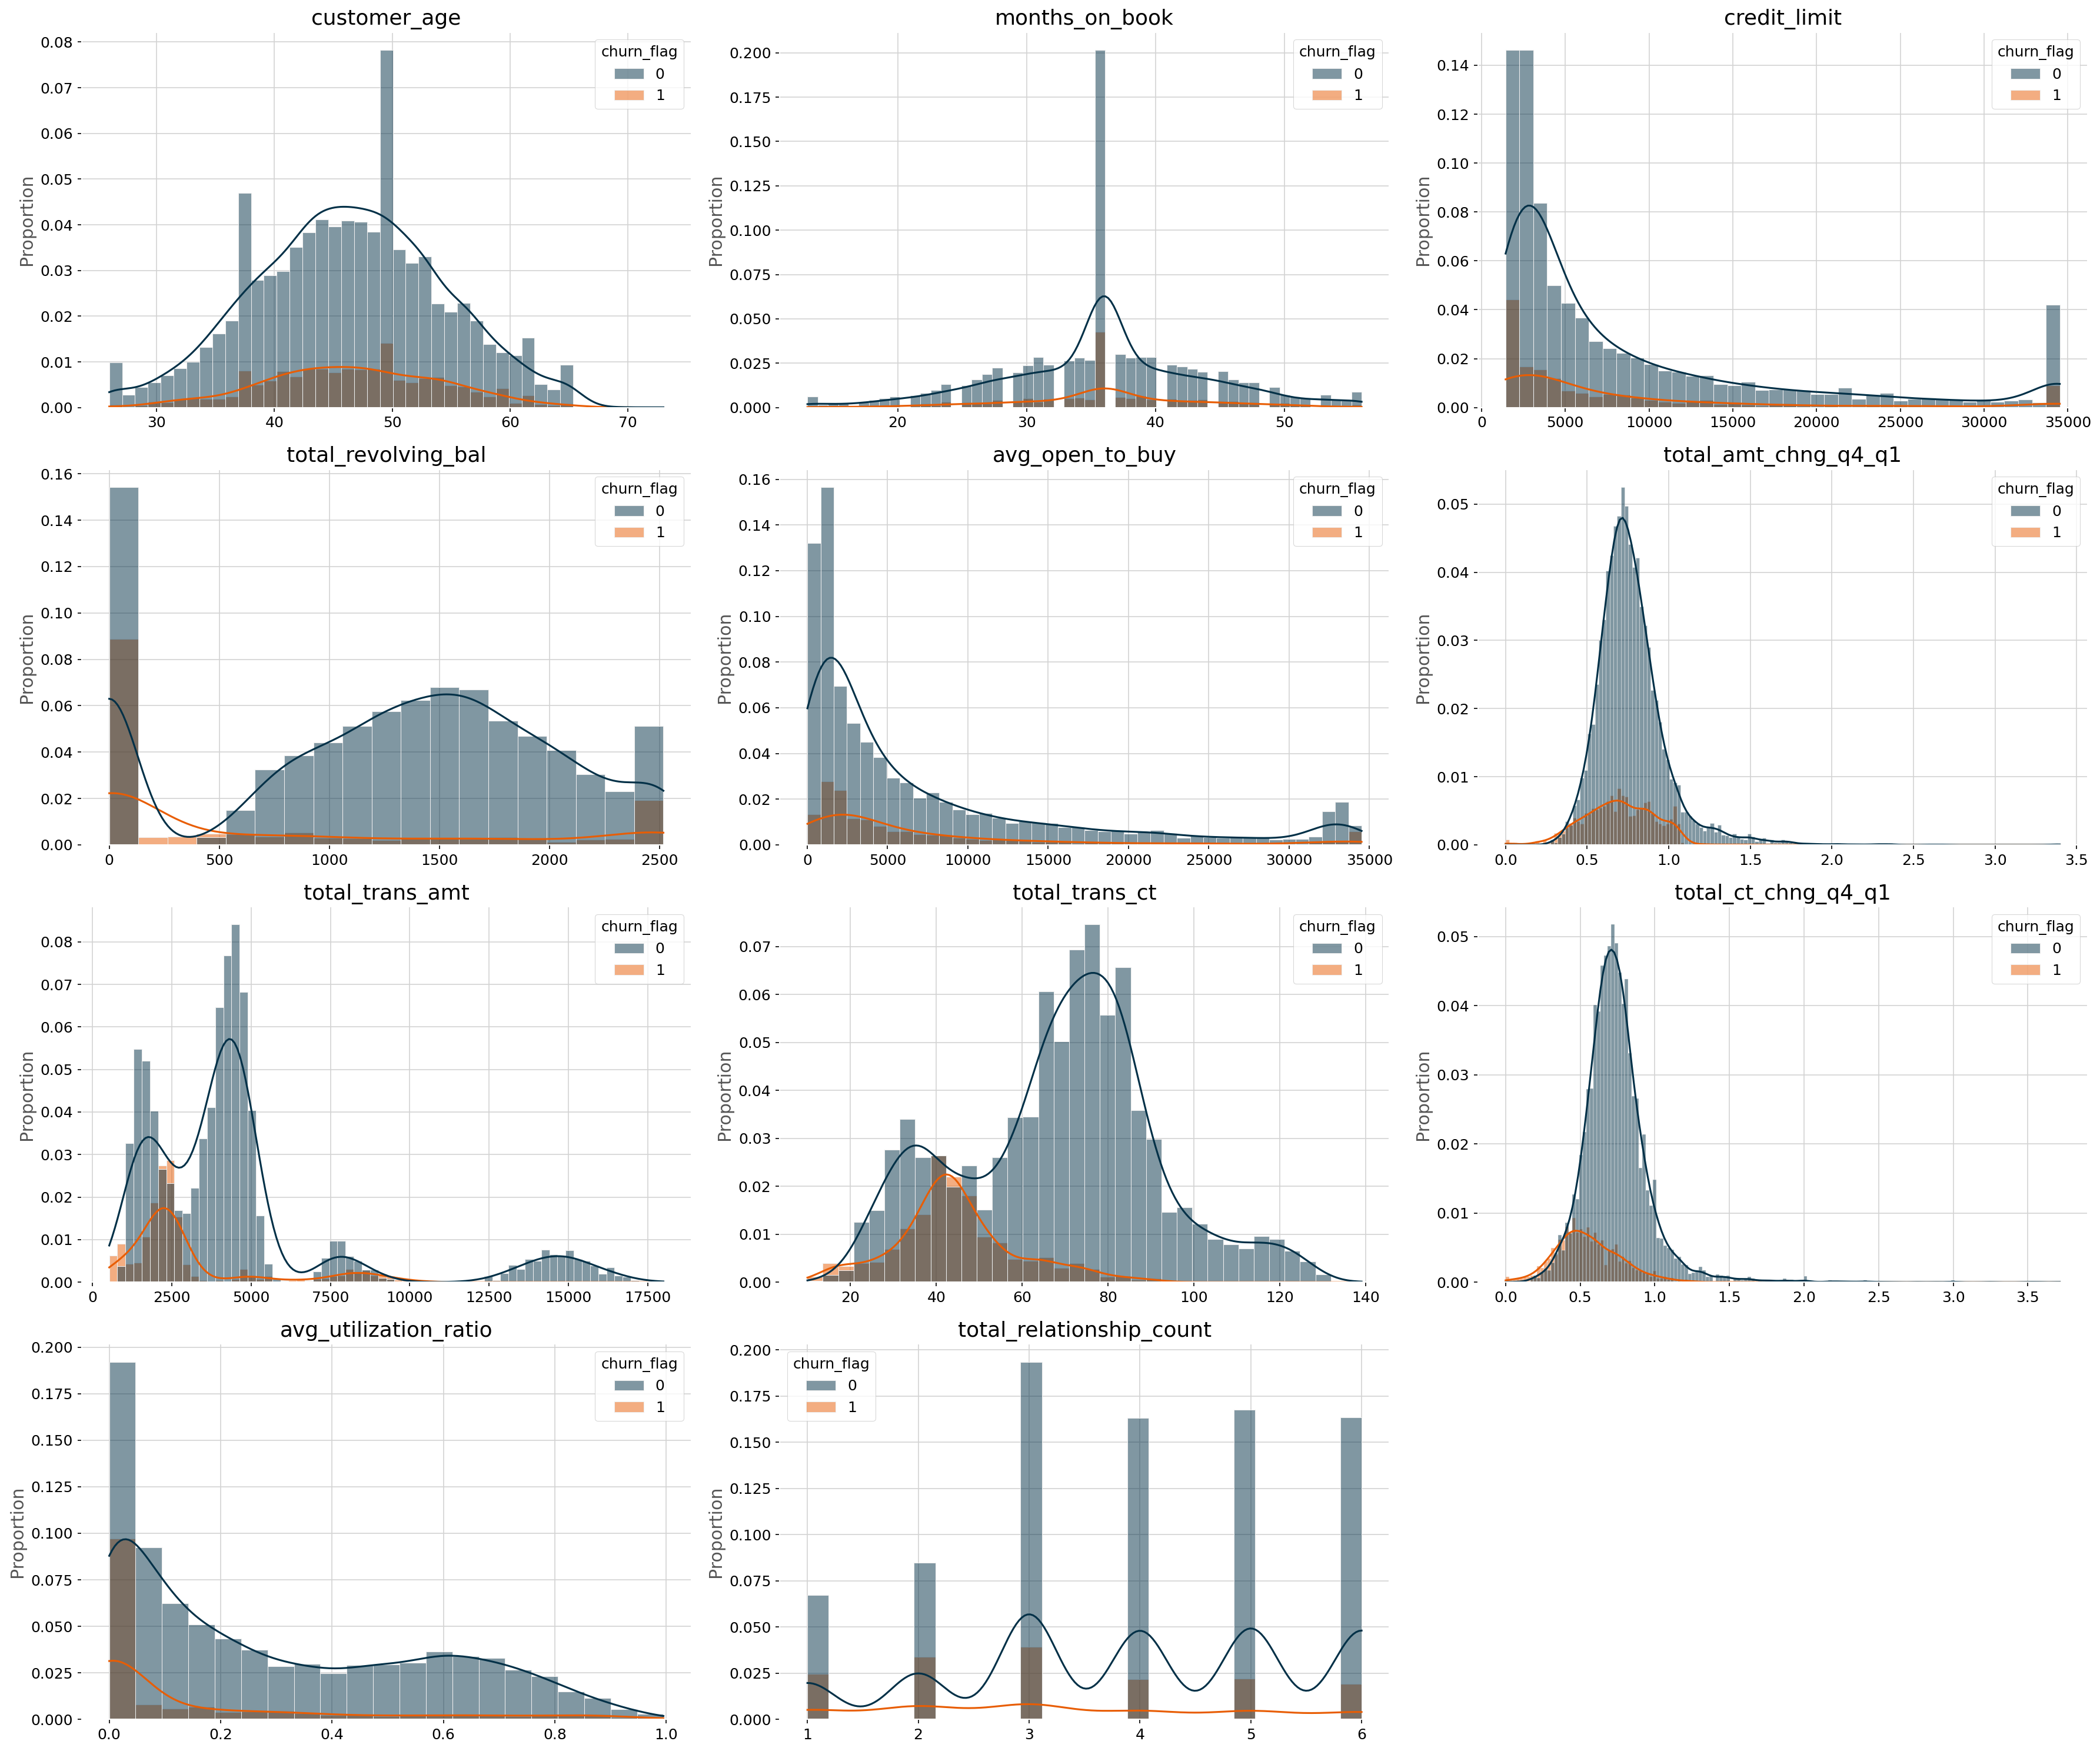

In [33]:
analysis_plots(data=train, features=numplots_features, histplot=True, kde=True, hue=target, figsize=(24, 20))

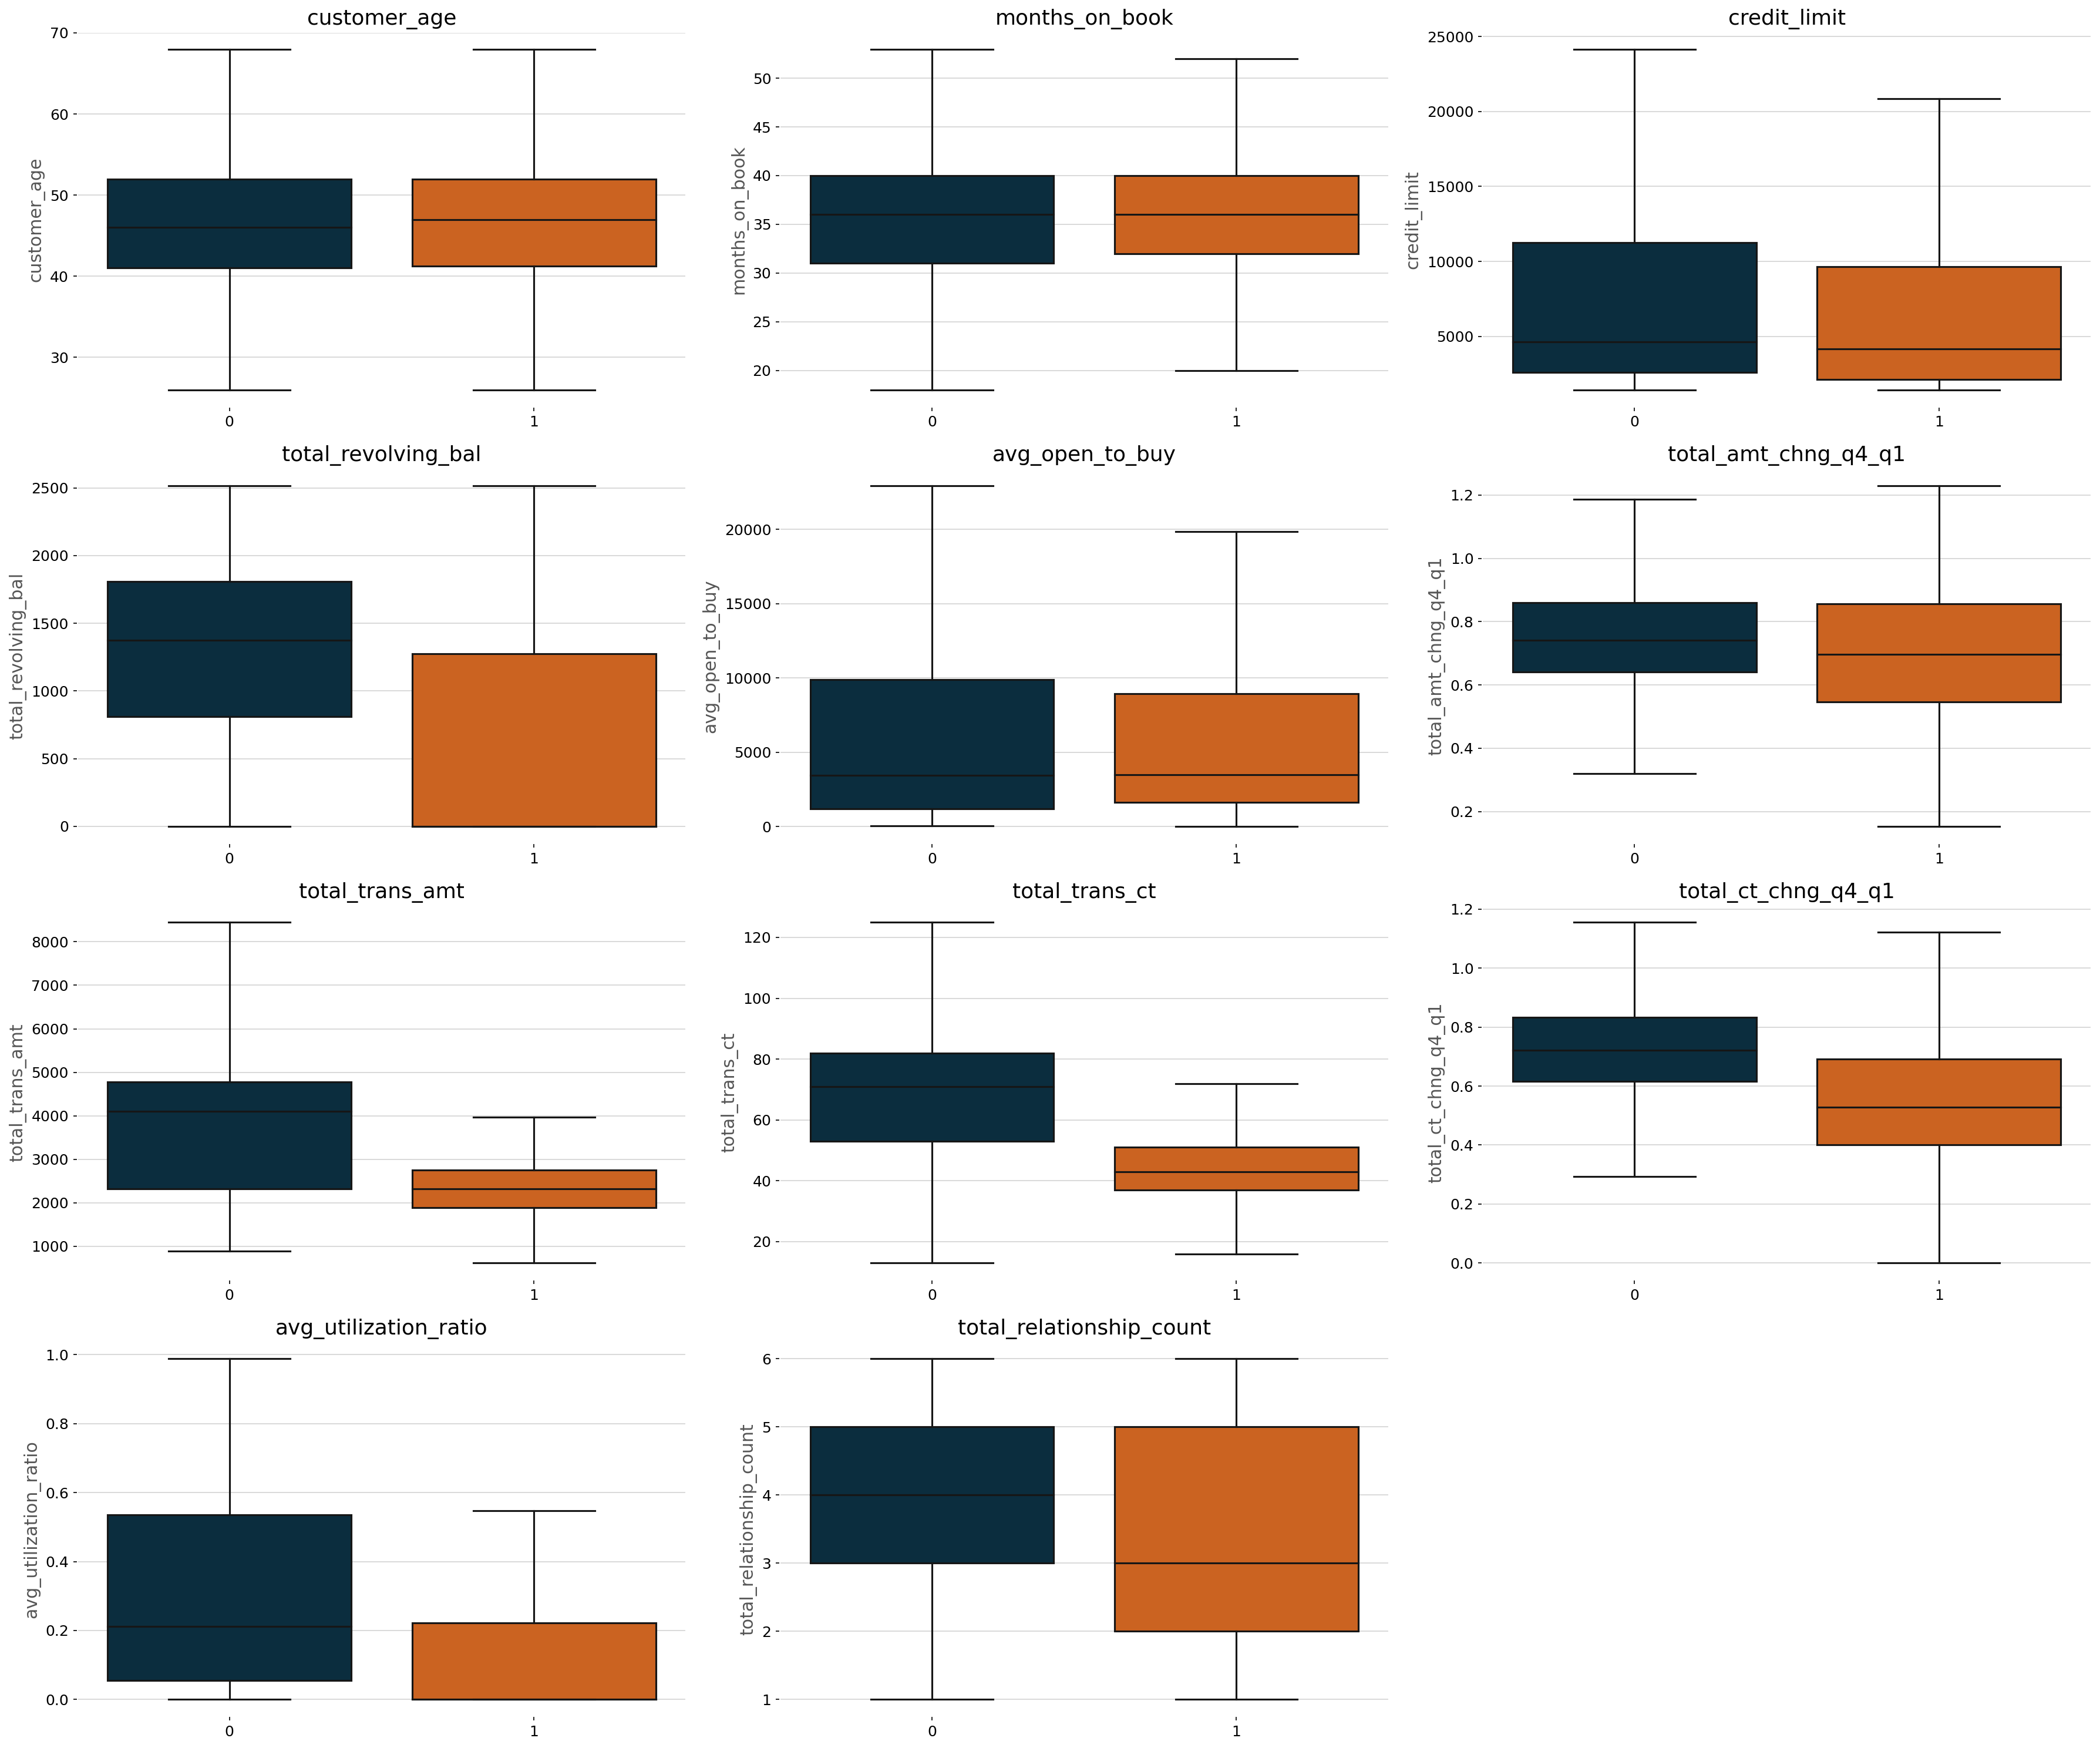

In [34]:
analysis_plots(data=train, features=numplots_features, boxplot=True, boxplot_x=target, figsize=(24, 20))

Insights:
- Clientes que desistem tendem a ter menos produtos do banco. Clientes que cancelaram geralmente possuem entre 1 e 3 produtos.

- Clientes que desistem tendem a ter limites de crédito um pouco menores.

- Clientes que desistem tendem a ter saldos rotativos mais baixos, o que faz sentido, já que os desistentes tendem a usar menos seus cartões de crédito. Especialmente, uma grande parte deles apresenta saldo rotativo zero.

- Clientes que desistem tendem a ter montantes de transações mais baixos, o que faz total sentido. Quando um cliente está prestes a abandonar o serviço, ele realizará menos transações, resultando em montantes menores em um período.

- Clientes que desistem tendem a ter contagens de transações mais baixas, o que faz total sentido. Quando um cliente está prestes a abandonar o serviço, ele realizará menos transações.

- Clientes que desistem tendem a ter menores variações em suas contagens de transações, o que faz sentido, já que fazer menos transações reduzirá a variação nas contagens.

- Como esperado, clientes que desistem tendem a ter uma taxa de utilização média mais baixa. Particularmente, muitos deles tendem a ter uma taxa de utilização zero.

- Uma observação importante é que uma boa prática seria discretizar essas características contínuas para melhor analisar suas distribuições por desistentes e não desistentes. No entanto, com os gráficos acima, podemos claramente ver uma discriminação e, como pretendo focar no poder preditivo, construindo modelos mais robustos como LightGBM, em termos de pré-processamento, a discretização de características aumentaria a dimensionalidade e provavelmente seria prejudicial.

### Distribuições de Características Categóricas por Taxa de Churn
Vou examinar como a taxa de churn está distribuída em diferentes categorias de variáveis categóricas para avaliar quais são as categorias com maiores proporções de clientes que cancelaram. Essa análise ajudará a identificar quais características categóricas estão mais associadas ao churn e podem ser úteis na identificação de perfis de clientes propensos a cancelar o serviço.

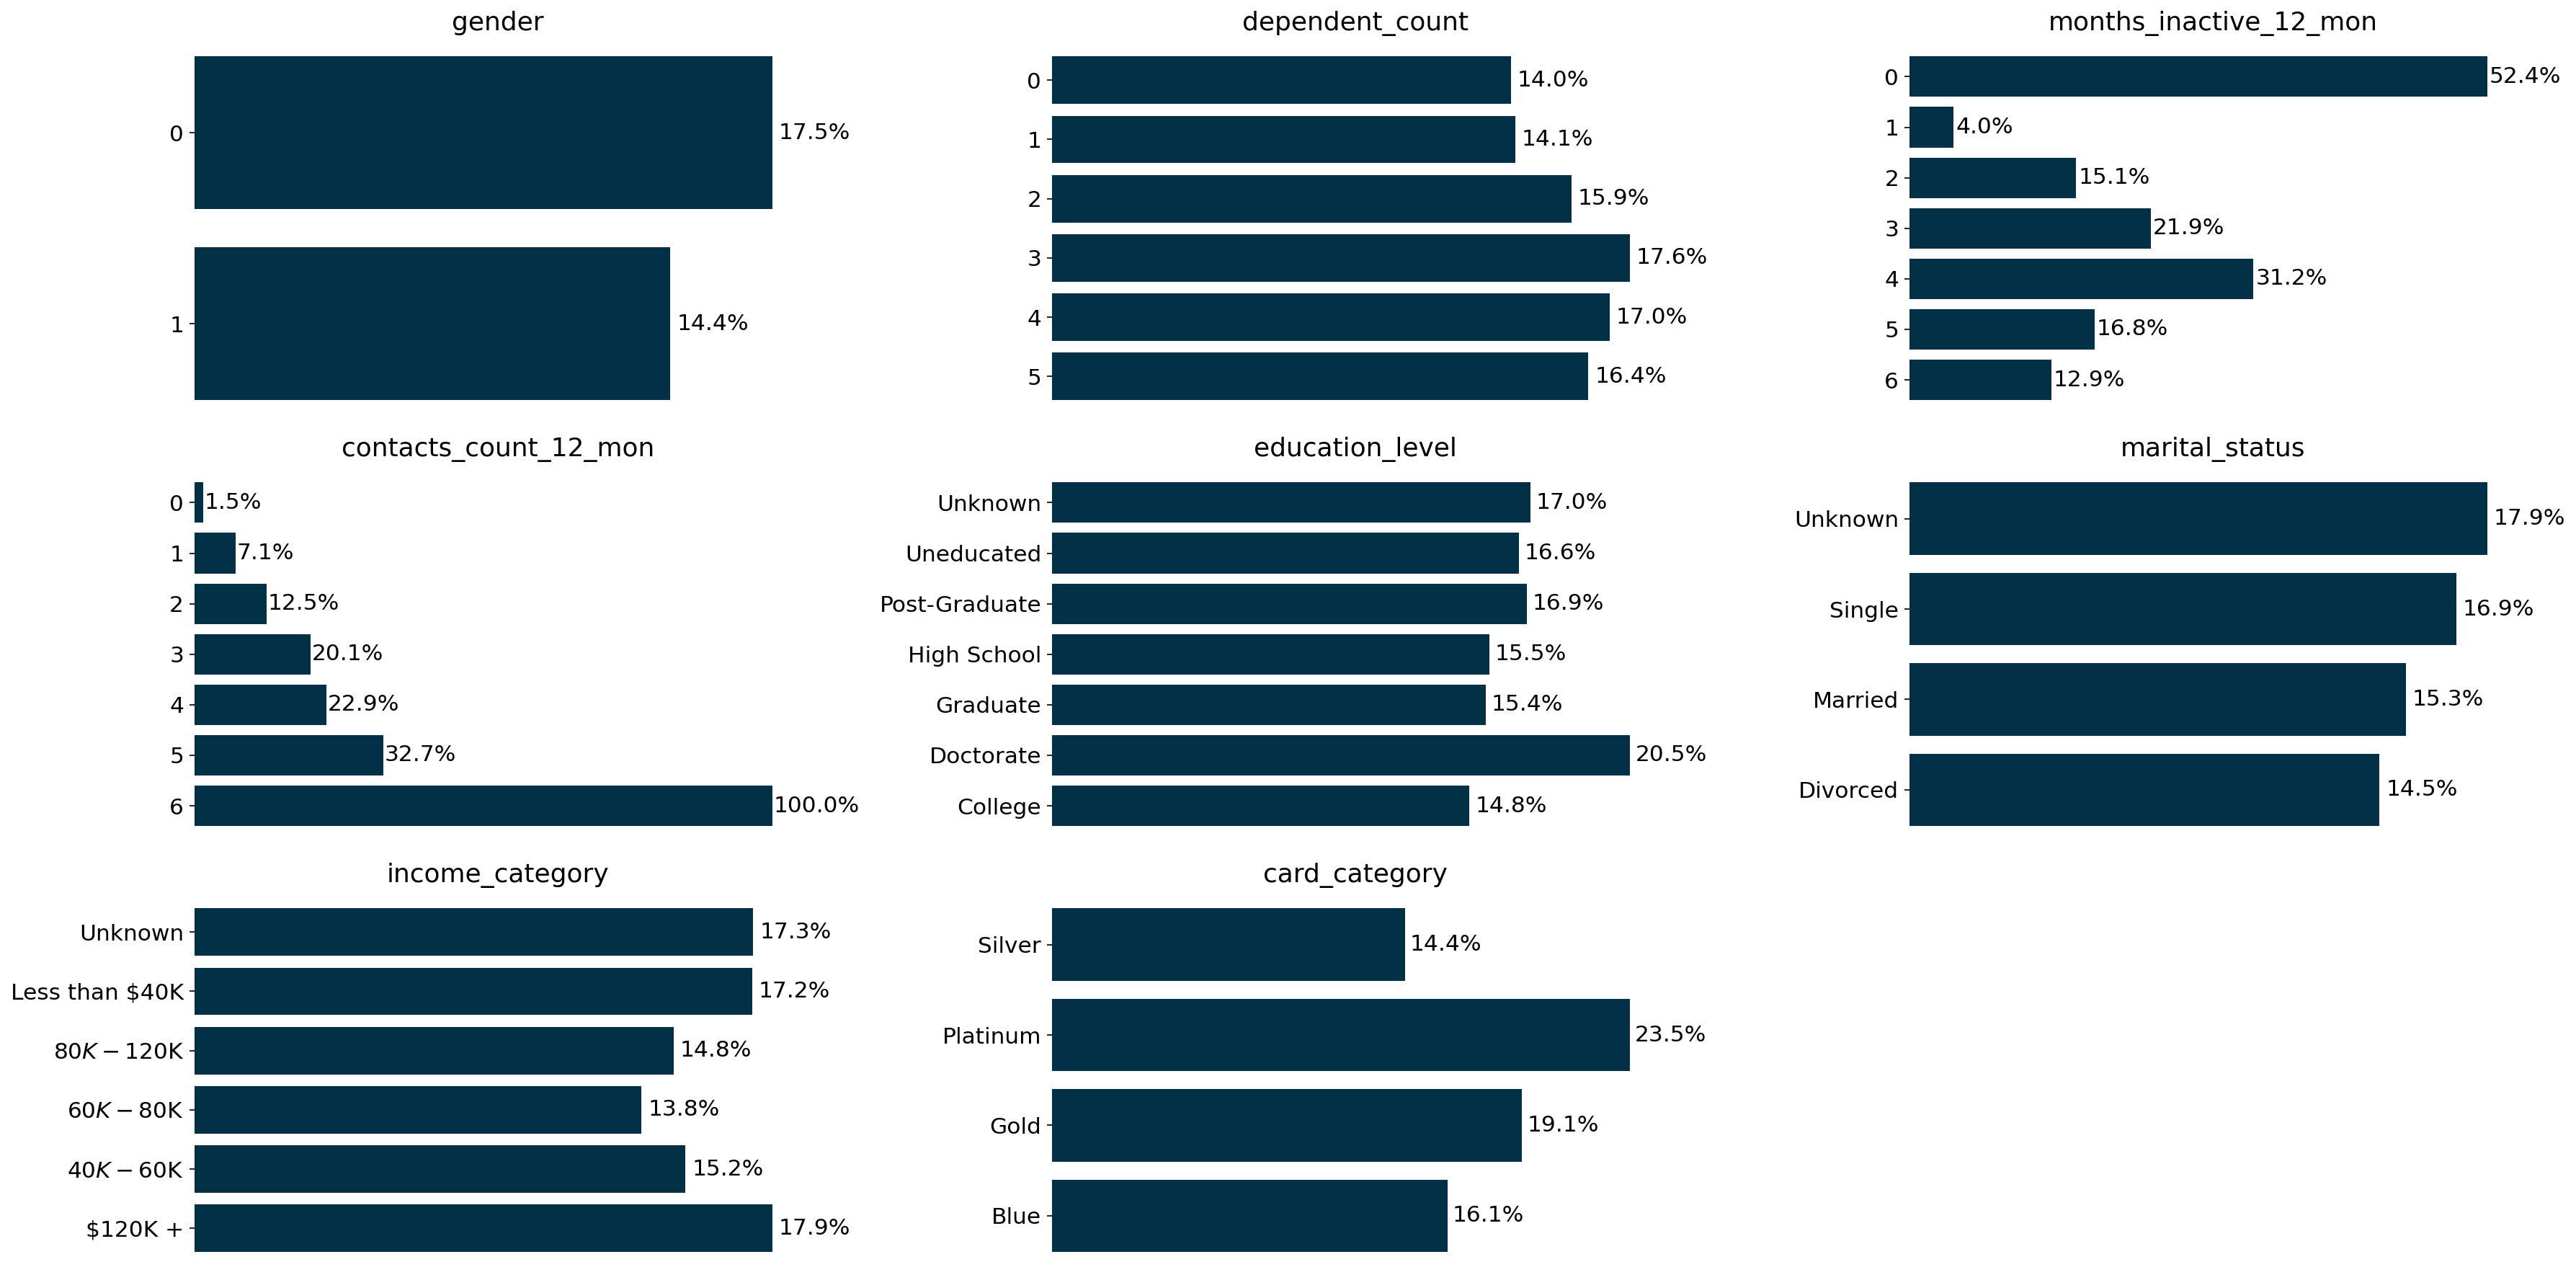

In [35]:
analysis_plots(data=train, features=barplot_features, barplot=True, figsize=(24, 12), hue=target, text_y=0.2)

Insights:
- A taxa de churn aumenta consistentemente de forma monótona à medida que o número de contatos com o banco aumenta. Especialmente, todos os clientes que fizeram seis contatos cancelaram.

- No estado civil, a categoria desconhecida apresenta a maior taxa de churn. Para nível de educação e categoria de renda, apresenta as segundas maiores taxas de churn. Portanto, é uma boa prática deixá-lo como outra categoria dessas variáveis no passo de pré-processamento, pois ajuda a discriminar entre clientes que cancelaram e os que não cancelaram.

- Embora a categoria do cartão seja altamente desequilibrada em direção ao tipo azul, é possível ver que a taxa de churn varia entre as categorias. Em particular, Platinum apresenta a maior taxa de churn. Mesmo tendo um número muito baixo de observações, como estou focando no poder preditivo, construindo modelos robustos como o LightGBM, deixarei esta variável e avaliarei sua importância de recurso ou aplicarei um método de seleção de recurso para mantê-la ou removê-la posteriormente.

- A taxa de churn é maior para mulheres.

- Surpreendentemente, os clientes que nunca estiveram inativos nos últimos 12 meses apresentam a maior taxa de churn.

- Os clientes com nível educacional de doutorado apresentam a maior taxa de churn entre os outros níveis.

### EDA conclusions

<b>Main insights:</b>
- O banco deve estar atento à distribuição da taxa de utilização média. O fato de ser assimétrica à direita significa que a maioria dos clientes tem uma baixa utilização do serviço. Em particular, cerca de 25% deles apresentam uma taxa de utilização zero. Portanto, a empresa deve planejar estratégias para aumentar a utilização e, consequentemente, a receita.

- 90% dos clientes estiveram inativos de 1 a 3 meses nos últimos 12 meses. O banco deve planejar estratégias não apenas para aumentar a taxa de utilização, mas também para evitar a inatividade do cliente.

- 75% dos clientes entraram em contato com o banco pelo menos 2 vezes nos últimos 12 meses. O banco deve prestar atenção a isso e descobrir os motivos pelos quais os clientes estão ligando. Eles estão insatisfeitos com o serviço do cartão de crédito? Se sim, o que especificamente está causando sua insatisfação?

- A idade do cliente e os meses de relacionamento com o banco têm uma correlação positiva forte. Quanto mais velho o cliente, mais tempo ele passa consumindo os serviços do cartão de crédito do banco e vice-versa. Portanto, a empresa deve concentrar seus esforços em reter os clientes mais antigos e aumentar a permanência dos mais jovens.

- O limite de crédito e a taxa de utilização média apresentam uma relação de queda exponencial! Isso indica que, à medida que o limite de crédito aumenta, a taxa de utilização média diminui exponencialmente. Portanto, os clientes com limites de crédito mais altos usam seus cartões de crédito menos.

- Os clientes que cancelam tendem a ter limites de crédito, saldos rotativos, montantes de transações, contagens de transações, mudanças nas contagens de transações e taxas de utilização média mais baixos (na verdade, muitos deles apresentam uma taxa de utilização zero). Isso faz total sentido, porque quando um cliente está prestes a interromper o serviço, ele faz menos transações, resultando em valores mais baixos desses atributos.

- A taxa de churn aumenta consistentemente de forma monótona à medida que o número de contatos com o banco aumenta. Especialmente, todos os clientes que fizeram seis contatos cancelaram. Além disso, os clientes com nível educacional de doutorado apresentam a maior taxa de churn entre os outros níveis.